<a href="https://colab.research.google.com/github/olivia-sp/h2-station-dev/blob/main/station_model_total_v0_6_olivia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#ver0.1 - EDA
#ver0.2 - EDA 업데이트 및 모델 개선


# EDA

In [1]:
import pandas as pd
import os

from sklearn.model_selection import train_test_split
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt


In [2]:
import os

if os.path.isfile('/content/content/drive/MyDrive/Colab Notebooks/data_set/result-congress-26-tune1.csv') == True:
  print('already')
else:
  #os.mkdir('data_set')
  %cd data_set
  !wget https://raw.githubusercontent.com/olivia-sp/h2-station-dev/main/data_set/result-congress-26-tune1.csv

% cd /content


[Errno 2] No such file or directory: 'data_set'
/content
--2022-03-15 01:00:26--  https://raw.githubusercontent.com/olivia-sp/h2-station-dev/main/data_set/result-congress-26-tune1.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2022-03-15 01:00:26 ERROR 404: Not Found.

/content


In [3]:
CURR_PATH = os.getcwd()

os.listdir(CURR_PATH)
#DATA_PATH = os.path.join(CURR_PATH,'data_set')
RAW_PATH = CURR_PATH + '/drive/MyDrive/Colab Notebooks/data_set/result-congress-26-tune1.csv'



In [4]:
df_raw_data = pd.read_csv(RAW_PATH, index_col=0)
df_raw_data.info()

df_raw_data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77222 entries, 0 to 77436
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   holiday             77222 non-null  bool   
 1   weekend             77222 non-null  bool   
 2   time                77222 non-null  object 
 3   precipitation_type  46123 non-null  float64
 4   temperature         46123 non-null  float64
 5   station_name        77222 non-null  int64  
 6   filename            77222 non-null  object 
 7   precipitation       46123 non-null  float64
 8   total_car_num       77222 non-null  int64  
 9   day_week            77222 non-null  object 
 10  decision_car_num    76980 non-null  object 
 11  humid               46123 non-null  float64
 12  max_car_num         76907 non-null  float64
 13  year                77222 non-null  int64  
 14  month               77222 non-null  int64  
 15  day                 77222 non-null  int64  
 16  hour

holiday                   0
weekend                   0
time                      0
precipitation_type    31099
temperature           31099
station_name              0
filename                  0
precipitation         31099
total_car_num             0
day_week                  0
decision_car_num        242
humid                 31099
max_car_num             315
year                      0
month                     0
day                       0
hour                      0
minute                    0
second                    0
dtype: int64

In [ ]:
df_raw_data = df_raw_data.reset_index()

In [ ]:
df_raw_data2=df_raw_data.drop(['decision_car_num', 'max_car_num', 'filename', 'index'], axis=1)
df_raw_data2.isnull().sum()

holiday                   0
weekend                   0
time                      0
precipitation_type    31099
temperature           31099
station_name              0
precipitation         31099
total_car_num             0
day_week                  0
humid                 31099
year                      0
month                     0
day                       0
hour                      0
minute                    0
second                    0
dtype: int64

In [ ]:
df_raw_data2

,holiday,weekend,time,precipitation_type,temperature,station_name,precipitation,total_car_num,day_week,humid,year,month,day,hour,minute,second
0,False,False,2020-09-17-21h-20m-28s,0.0,23.0,26,0.0,2,thu,52.0,2020,9,17,21,20,28
1,False,False,2020-09-17-21h-38m-08s,0.0,23.0,26,0.0,3,thu,52.0,2020,9,17,21,38,8
2,False,False,2020-09-18-16h-45m-41s,0.0,25.3,26,0.0,4,fri,38.0,2020,9,18,16,45,41
3,False,False,2020-09-18-16h-50m-00s,0.0,25.3,26,0.0,4,fri,38.0,2020,9,18,16,50,0
4,False,False,2020-09-18-16h-55m-00s,0.0,25.3,26,0.0,4,fri,38.0,2020,9,18,16,55,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77217,False,False,2022-01-06-16h-40m-00s,NaN,NaN,26,NaN,3,thu,NaN,2022,1,6,16,40,0
77218,False,False,2022-01-06-16h-45m-00s,NaN,NaN,26,NaN,3,thu,NaN,2022,1,6,16,45,0
77219,False,False,2022-01-06-16h-50m-00s,NaN,NaN,26,NaN,4,thu,NaN,2022,1,6,16,50,0
77220,False,False,2022-01-06-16h-55m-00s,NaN,NaN,26,NaN,2,thu,NaN,2022,1,6,16,55,0


Holiday 처리

In [ ]:
!pip install holidays

In [ ]:
# Holiday Data 추가   
import holidays

time_df = pd.DataFrame(df_raw_data2['time'])
time_df['time'] = pd.to_datetime(time_df['time'], format='%Y-%m-%d-%Hh-%Mm-%Ss', errors='raise')
time_df['date'] = time_df['time'].dt.date

holiday_list = time_df['date']


Year 끝 두자리로 변환

In [ ]:
#Year 끝 2자리 사용
time_df['year'] = time_df['time'].dt.strftime("%y")
time_df['year']
# time_df['year'] = time_df['time2'].dt.year

0        20
1        20
2        20
3        20
4        20
         ..
77217    22
77218    22
77219    22
77220    22
77221    22
Name: year, Length: 77222, dtype: object

In [ ]:
# 한국 휴일 개체 생성
kr_holidays = holidays.KR()

# generate holiday table 
holiday_df = pd.DataFrame(columns=['ds', 'imp_holiday'])
holiday_df['ds'] = holiday_list
holiday_df['imp_holiday'] = holiday_df.ds.apply(lambda x: 'True' if x in kr_holidays else 'False')

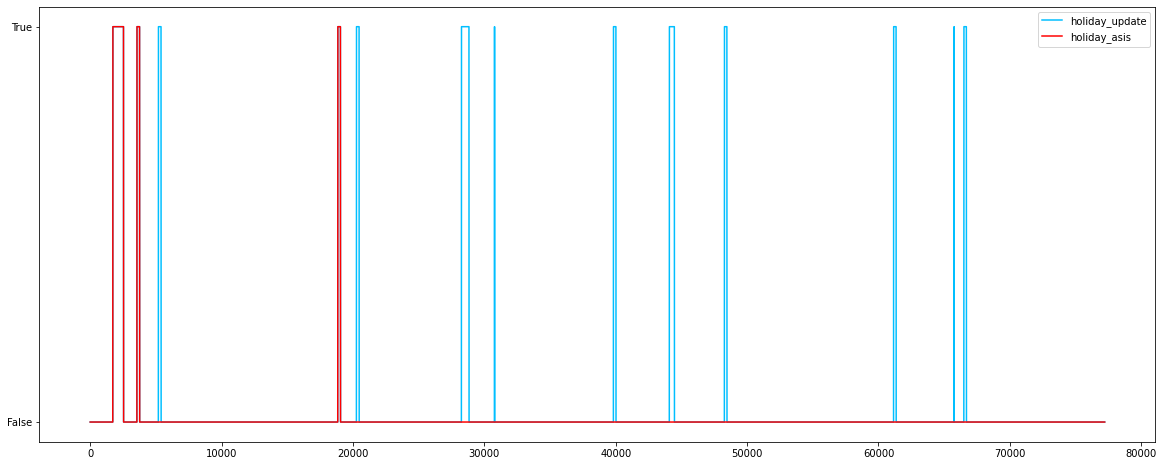

In [ ]:
# subplot 적용
fig = plt.figure(figsize = (20, 8))
chart = fig.add_subplot(1,1,1)


chart.plot(holiday_df['imp_holiday'], color='deepskyblue' , label='holiday_update')
chart.plot(df_raw_data2['holiday'], color='red' , label='holiday_asis')

#chart.plot(roll_mean20, color='pink' , label='')
plt.legend(loc = 'best')

In [ ]:
df_raw_data2['year'] = time_df['year'].astype(int)
df_raw_data2['holiday'] = holiday_df['imp_holiday']

Season 데이터 생성

In [ ]:
def SeasonData(month):
    if month in [12,1,2]:
        return 'winter'
    elif month in [3,4,5]:
        return 'spring'
    elif month in [6,7,8]:
        return 'summer'
    elif month in [9,10,11]:
        return 'autumn'

df_raw_data2['season'] = df_raw_data2.month.apply(SeasonData)

Hour_group 데이터 생성
- Dawn 0시~7시
- Morning 7시~12시
- Lunch 12시~13시
- Day 13시~18시
- Dinner 18시~19시
- Night 19시~0시

In [ ]:
def HourGroupData(hour):
    if hour in [1,2,3,4,5,6]:
        return 'dawn'
    elif hour in [7,8,9,10,11]:
        return 'morning'
    elif hour in [12]:
        return 'lunch'
    elif hour in [13,14,15,16,17]:
        return 'afternoon'
    elif hour in [18]:
      return 'dinner'
    elif hour in [19, 20, 21, 22, 23, 0]:
      return 'night'

df_raw_data2['hour_group'] = df_raw_data2.hour.apply(HourGroupData)

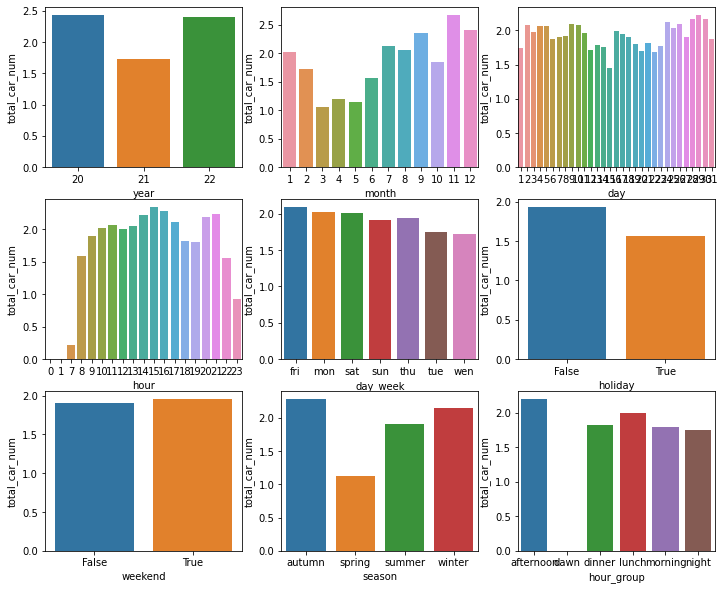

In [ ]:
#year와 count
fig = plt.figure(figsize=[12,10])
ax1 = fig.add_subplot(3,3,1)
ax1 = sns.barplot(x='year',y='total_car_num',data=df_raw_data2.groupby('year')['total_car_num'].mean().reset_index())

#month와 count
ax2 = fig.add_subplot(3,3,2)
ax2 = sns.barplot(x='month',y='total_car_num',data=df_raw_data2.groupby('month')['total_car_num'].mean().reset_index())

#day와 count
ax3 = fig.add_subplot(3,3,3)
ax3 = sns.barplot(x='day',y='total_car_num',data=df_raw_data2.groupby('day')['total_car_num'].mean().reset_index())

#hour와 count
ax4 = fig.add_subplot(3,3,4)
ax4 = sns.barplot(x='hour',y='total_car_num',data=df_raw_data2.groupby('hour')['total_car_num'].mean().reset_index())

#day_week과 count
ax5 = fig.add_subplot(3,3,5)
ax5 = sns.barplot(x='day_week',y='total_car_num',data=df_raw_data2.groupby('day_week')['total_car_num'].mean().reset_index())

#holiday와 count
ax6 = fig.add_subplot(3,3,6)
ax6 = sns.barplot(x='holiday',y='total_car_num',data=df_raw_data2.groupby('holiday')['total_car_num'].mean().reset_index())

#weekend와 count
ax7 = fig.add_subplot(3,3,7)
ax7 = sns.barplot(x='weekend',y='total_car_num',data=df_raw_data2.groupby('weekend')['total_car_num'].mean().reset_index())

#season과 count
ax8 = fig.add_subplot(3,3,8)
ax8 = sns.barplot(x='season',y='total_car_num',data=df_raw_data2.groupby('season')['total_car_num'].mean().reset_index())

#hour_group과 count
ax9 = fig.add_subplot(3,3,9)
ax9 = sns.barplot(x='hour_group',y='total_car_num',data=df_raw_data2.groupby('hour_group')['total_car_num'].mean().reset_index())

In [ ]:
# sns.pairplot(df_raw_data2, height=5);
# plt.show()

In [ ]:
# plt.figure(figsize=(15,15))
# sns.heatmap(data = df_raw_data2.corr(), annot=True, 
# fmt = '.2f', linewidths=.5, cmap='Blues')

In [ ]:
df_raw_data2.drop(df_raw_data.loc[df_raw_data['total_car_num'] == 6].index, inplace =True)
df_raw_data2.info()

df_raw_data2.drop('time', axis=1, inplace = True)
df_raw_data2.info()

# df_raw_data2['day_week'].replace('mon', 0, inplace = True)
# df_raw_data2['day_week'].replace('tue', 1, inplace = True)
# df_raw_data2['day_week'].replace('wen', 2, inplace = True)
# df_raw_data2['day_week'].replace('thu', 3, inplace = True)
# df_raw_data2['day_week'].replace('fri', 4, inplace = True)
# df_raw_data2['day_week'].replace('sat', 5, inplace = True)
# df_raw_data2['day_week'].replace('sun', 6, inplace = True)

df_raw_data2['holiday'] = df_raw_data['holiday'].astype(int)
df_raw_data2['weekend'] = df_raw_data['weekend'].astype(int)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77222 entries, 0 to 77221
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   holiday             77222 non-null  object 
 1   weekend             77222 non-null  bool   
 2   time                77222 non-null  object 
 3   precipitation_type  46123 non-null  float64
 4   temperature         46123 non-null  float64
 5   station_name        77222 non-null  int64  
 6   precipitation       46123 non-null  float64
 7   total_car_num       77222 non-null  int64  
 8   day_week            77222 non-null  object 
 9   humid               46123 non-null  float64
 10  year                77222 non-null  int64  
 11  month               77222 non-null  int64  
 12  day                 77222 non-null  int64  
 13  hour                77222 non-null  int64  
 14  minute              77222 non-null  int64  
 15  second              77222 non-null  int64  
 16  seas

In [ ]:
day_week_dum = pd.get_dummies(df_raw_data2['day_week'])
# df_raw_data3 + day_week_dum
df_dum1 = df_raw_data2.join(day_week_dum,how='left')

In [ ]:
season_dum = pd.get_dummies(df_dum1['season'])
# df_raw_data3 + day_week_dum
df_dum2 = df_dum1.join(season_dum,how='left')

In [ ]:
hrgroup_dum = pd.get_dummies(df_dum2['hour_group'])
# df_raw_data3 + day_week_dum
df_dum3 = df_dum2.join(hrgroup_dum,how='left')

In [ ]:
df_raw_data3=df_dum3.drop(['day_week', 'season', 'hour_group'], axis=1)
df_raw_data3

,holiday,weekend,precipitation_type,temperature,station_name,precipitation,total_car_num,humid,year,month,day,hour,minute,second,fri,mon,sat,sun,thu,tue,wen,autumn,spring,summer,winter,afternoon,dawn,dinner,lunch,morning,night
0,0,0,0.0,23.0,26,0.0,2,52.0,20,9,17,21,20,28,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1
1,0,0,0.0,23.0,26,0.0,3,52.0,20,9,17,21,38,8,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1
2,0,0,0.0,25.3,26,0.0,4,38.0,20,9,18,16,45,41,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
3,0,0,0.0,25.3,26,0.0,4,38.0,20,9,18,16,50,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
4,0,0,0.0,25.3,26,0.0,4,38.0,20,9,18,16,55,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77217,0,0,NaN,NaN,26,NaN,3,NaN,22,1,6,16,40,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0
77218,0,0,NaN,NaN,26,NaN,3,NaN,22,1,6,16,45,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0
77219,0,0,NaN,NaN,26,NaN,4,NaN,22,1,6,16,50,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0
77220,0,0,NaN,NaN,26,NaN,2,NaN,22,1,6,16,55,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0


In [ ]:
#df_raw_data3.describe()

In [ ]:
df_raw_data3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77222 entries, 0 to 77221
Data columns (total 31 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   holiday             77222 non-null  int64  
 1   weekend             77222 non-null  int64  
 2   precipitation_type  46123 non-null  float64
 3   temperature         46123 non-null  float64
 4   station_name        77222 non-null  int64  
 5   precipitation       46123 non-null  float64
 6   total_car_num       77222 non-null  int64  
 7   humid               46123 non-null  float64
 8   year                77222 non-null  int64  
 9   month               77222 non-null  int64  
 10  day                 77222 non-null  int64  
 11  hour                77222 non-null  int64  
 12  minute              77222 non-null  int64  
 13  second              77222 non-null  int64  
 14  fri                 77222 non-null  uint8  
 15  mon                 77222 non-null  uint8  
 16  sat 

결측값 처리

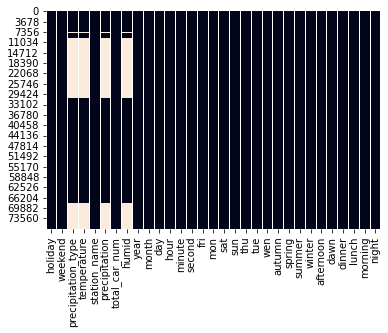

In [ ]:
%matplotlib inline
sns.heatmap(df_raw_data3.isnull(), cbar=False)

Data Imputation
1. mean/median : 작은 크기의 숫자형 데이터셋, 다른 feature 간 상관관계 고려 안 함, 범주형 feature 사용 불가, 부정확함
2. most frequent/zero/constant : 범주형 데이터셋, 다른 feature 간 상관관계 고려 안 함, 데이터 bias 생성 가능
3. KNN imputation : feature similarity  이용하여 근접한 데이터 찾음(impyute lib), 데이터셋에 따라 다르나 가장 정확함, 메모리 많이 필요, outlier에 민감
4. MICE : 누락된 데이터 여러번 채우는 방식, 연속형/이진형/범위형 패턴 처리 가능, imputation-analysis(m개의 완성된 데이터 분석)-pooling(평균,분산,신뢰구간 계산하여 합침)
5. 딥러닝 이용 : 범주형/non-numerical 데이터에 매우 효과적, DNN 이용해서 누락 값 유추, 한번에 한 컬럼만 대체 가능, 대규모 데이터셋은 속도가 상당히 느림, 유추할 feature에 대한 정보있는 feature 직접 지정해야 함
6. stochastic regression imputation : 동일 데이터셋의 다른 feature에서 결측값 예측
7. Extrapolation and Interpolation : 이산형 범위 내 데이터로부터 값 추정, interpolation(20살, 40살 데이터로 30살 추측), Extrapolation(1~20 데이터로 10년 후 예측, 안정성 떨어짐)
8. Hot-Deck Imputation : 비슷한 데이터셋에서 랜덤하게 선택


In [ ]:
df_null = df_raw_data3[['precipitation','precipitation_type', 'temperature', 'humid']]
df_raw_data4 = df_raw_data3.drop(['precipitation','precipitation_type', 'temperature', 'humid'], axis=1)
df_raw_data4

,holiday,weekend,station_name,total_car_num,year,month,day,hour,minute,second,fri,mon,sat,sun,thu,tue,wen,autumn,spring,summer,winter,afternoon,dawn,dinner,lunch,morning,night
0,0,0,26,2,20,9,17,21,20,28,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1
1,0,0,26,3,20,9,17,21,38,8,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1
2,0,0,26,4,20,9,18,16,45,41,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
3,0,0,26,4,20,9,18,16,50,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
4,0,0,26,4,20,9,18,16,55,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77217,0,0,26,3,22,1,6,16,40,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0
77218,0,0,26,3,22,1,6,16,45,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0
77219,0,0,26,4,22,1,6,16,50,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0
77220,0,0,26,2,22,1,6,16,55,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0


MICE

In [ ]:
!pip3 install impyute

In [ ]:
#다른 컬럼 상관관계 파악 필요
df_null_mice = df_raw_data3

In [ ]:
#df_null_mice.info()

In [ ]:
from impyute.imputation.cs import mice
imp_mice = mice(df_null_mice.values) # mice 학습시작
df_mice = pd.DataFrame(imp_mice, columns=df_null_mice.columns)

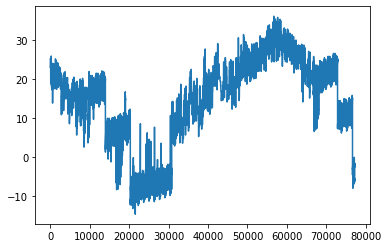

In [ ]:
df_mice['temperature'].plot()

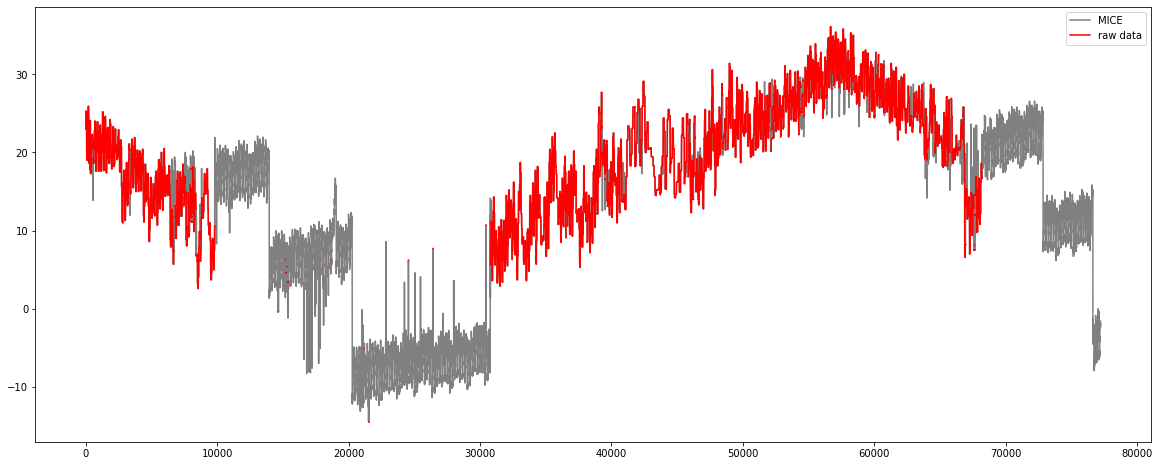

In [ ]:
# subplot 적용
fig = plt.figure(figsize = (20, 8))
chart = fig.add_subplot(1,1,1)

chart.plot(df_mice['temperature'], color='gray' , label='MICE')
chart.plot(df_raw_data3['temperature'], color='red' , label='raw data')
plt.legend(loc = 'best')

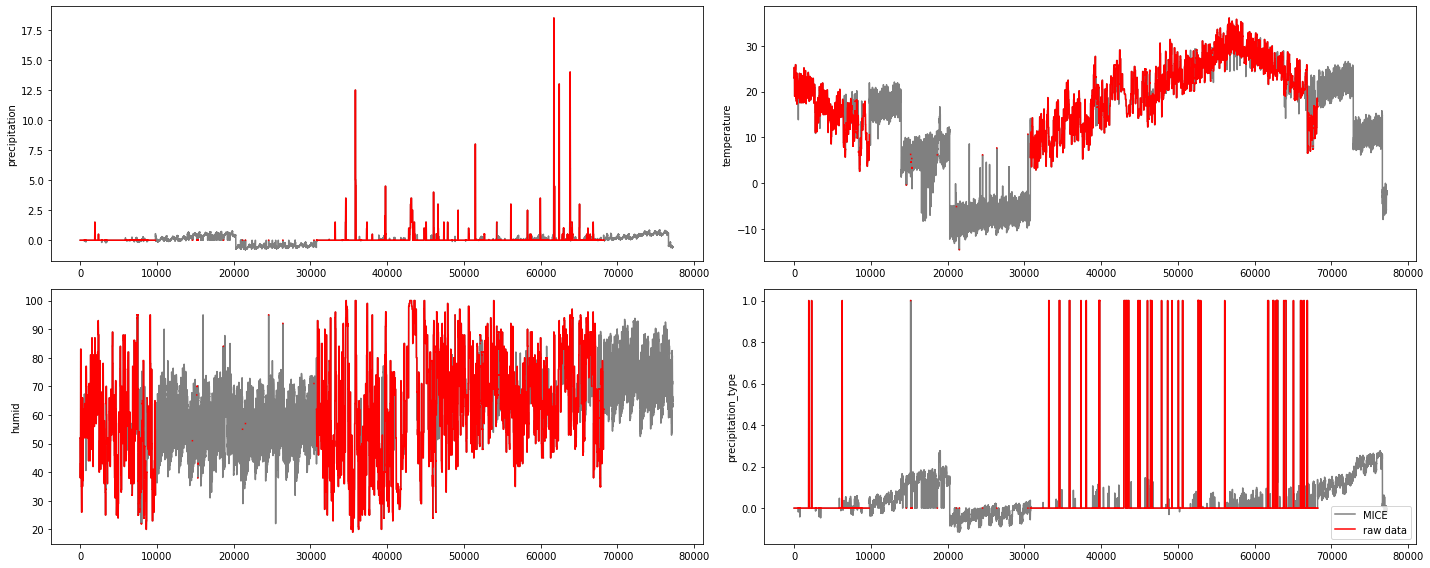

In [ ]:
# subplot 적용
plt.figure(figsize = (20, 8))

chart1 = plt.subplot(2,2,1)
plt.plot(df_mice['precipitation'], color='gray' , label='MICE')
plt.plot(df_raw_data2['precipitation'], color='red' , label='raw data')
plt.ylabel('precipitation')

chart2 = plt.subplot(2,2,2)
plt.plot(df_mice['temperature'], color='gray' , label='MICE')
plt.plot(df_raw_data2['temperature'], color='red' , label='raw data')
plt.ylabel('temperature')

chart3 = plt.subplot(2,2,3)
plt.plot(df_mice['humid'], color='gray' , label='MICE')
plt.plot(df_raw_data2['humid'], color='red' , label='raw data')
plt.ylabel('humid')

chart3 = plt.subplot(2,2,4)
plt.plot(df_mice['precipitation_type'], color='gray' , label='MICE')
plt.plot(df_raw_data2['precipitation_type'], color='red' , label='raw data')
plt.ylabel('precipitation_type')

#chart.plot(roll_mean20, color='pink' , label='')
plt.legend(loc = 'lower right')
plt.tight_layout()
plt.show()

In [ ]:
df_mice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77222 entries, 0 to 77221
Data columns (total 31 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   holiday             77222 non-null  float64
 1   weekend             77222 non-null  float64
 2   precipitation_type  77222 non-null  float64
 3   temperature         77222 non-null  float64
 4   station_name        77222 non-null  float64
 5   precipitation       77222 non-null  float64
 6   total_car_num       77222 non-null  float64
 7   humid               77222 non-null  float64
 8   year                77222 non-null  float64
 9   month               77222 non-null  float64
 10  day                 77222 non-null  float64
 11  hour                77222 non-null  float64
 12  minute              77222 non-null  float64
 13  second              77222 non-null  float64
 14  fri                 77222 non-null  float64
 15  mon                 77222 non-null  float64
 16  sat 

In [5]:
CURR_PATH = os.getcwd()
CURR_PATH

'/content'

In [6]:
CURR_PATH = os.getcwd()

os.listdir(CURR_PATH)
#DATA_PATH = os.path.join(CURR_PATH,'data_set')
SAVE_PATH = CURR_PATH + '/drive/MyDrive/Colab Notebooks/data_set/data_imputation_MICE.csv'

In [ ]:
df_mice.to_csv(SAVE_PATH, index=True)

NameError: ignored

#성능평가 - MICE

In [7]:
df_mice2 = pd.read_csv(SAVE_PATH, index_col=0)
df_mice2.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 77222 entries, 0 to 77221
Data columns (total 31 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   holiday             77222 non-null  float64
 1   weekend             77222 non-null  float64
 2   precipitation_type  77222 non-null  float64
 3   temperature         77222 non-null  float64
 4   station_name        77222 non-null  float64
 5   precipitation       77222 non-null  float64
 6   total_car_num       77222 non-null  float64
 7   humid               77222 non-null  float64
 8   year                77222 non-null  float64
 9   month               77222 non-null  float64
 10  day                 77222 non-null  float64
 11  hour                77222 non-null  float64
 12  minute              77222 non-null  float64
 13  second              77222 non-null  float64
 14  fri                 77222 non-null  float64
 15  mon                 77222 non-null  float64
 16  sat 

모델 적용

In [8]:
#df_raw_data3

In [9]:
#df_raw_data3 = df_raw_data3[['total_car_num','holiday','weekend','precipitation_type','temperature','station_name','precipitation','humid','year','month','day','hour','minute','second','fri','mon','sat','sun','thu','tue','wen','autumn','spring','summer','winter','afternoon','dawn','dinner','lunch','morning','night']]

In [10]:
df_new = df_mice2
df_new = df_new[['total_car_num','holiday','weekend','precipitation_type','temperature','station_name','precipitation','humid','year','month','day','hour','minute','second','fri','mon','sat','sun','thu','tue','wen','autumn','spring','summer','winter','afternoon','dawn','dinner','lunch','morning','night']]

In [11]:
X, y = df_new.iloc[:, 1:].values, df_new.iloc[:, :1].values
y = y. flatten()
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.2, 
                                                    random_state = 0,
                                                    stratify = y)
X_train, X_valid, y_train, y_valid = train_test_split(X, y, 
                                                    test_size = 0.2, 
                                                    random_state = 0,
                                                    stratify = y)

print('X_train :', X_train)
print('X_valid :', X_valid)
print('X_test :', X_test)
print('y_train :', y_train)
print('y_valid :', y_valid)
print('y_test :', y_test)

X_train : [[0.         0.         0.00185669 ... 0.         0.         1.        ]
 [0.         0.         0.         ... 0.         0.         1.        ]
 [0.         0.         0.         ... 0.         0.         1.        ]
 ...
 [0.         0.         0.         ... 0.         1.         0.        ]
 [0.         1.         0.18762297 ... 0.         0.         1.        ]
 [0.         1.         0.0375735  ... 1.         0.         0.        ]]
X_valid : [[0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [1. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
X_test : [[0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [1. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
y_train : [0. 4. 1. ... 0. 0. 4.]
y_valid : [3. 0. 0. ... 2. 1. 0.]
y_test : [3. 0. 0. ... 2. 1. 0.]


In [12]:
X_train_t = X_train.reshape(X_train.shape[0], 30, 1)
X_valid_t = X_valid.reshape(X_valid.shape[0], 30, 1)
X_test_t = X_test.reshape(X_test.shape[0], 30, 1)

print("최종 DATA")
print(X_train_t.shape)

최종 DATA
(61777, 30, 1)


In [13]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def confirm_result(y_test,y_pred):
  MAE=mean_absolute_error(y_test,y_pred)
  RMSE=np.sqrt(mean_squared_error(y_test,y_pred))
  #MSLE = mean_squared_log_error(y_test,y_pred)
  R2 = r2_score(y_test,y_pred)
  pd.options.display.float_format='{:.5f}'.format
  
  Result = pd.DataFrame(data=[MAE,RMSE,R2],index=['MAE','RMSE','R2'],columns=['Results'])
  return Result

#GRU

## GRU1,Dense1,adam

In [ ]:
import tensorflow as tf
from keras.models import Sequential 
from keras.layers import Dense 
import keras.backend as K 
from keras.callbacks import EarlyStopping
from keras.layers.recurrent_v2 import GRU

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

K.clear_session()
    
model_gru = Sequential() # Sequeatial Model 
model_gru.add(GRU(units=128,input_shape=(30, 1)))
model_gru.add(Dense(1)) # output = 1 
#model_gru.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error', 'r2_score'])
model_gru.compile(loss='mean_squared_error', optimizer='adam', metrics='mean_squared_error') 
model_gru.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 128)               50304     
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 50,433
Trainable params: 50,433
Non-trainable params: 0
_________________________________________________________________


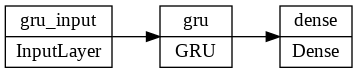

In [ ]:
tf.keras.utils.plot_model(
    model=model_gru, to_file="gru_model.png", show_shapes=False, rankdir="LR")

In [ ]:
early_stop = EarlyStopping(monitor='loss', patience=1, verbose=1)

hist_mice = model_gru.fit(X_train_t, y_train, epochs=100, 
                     batch_size=32, verbose=1, callbacks=[early_stop])

Epoch 1/100
1931/1931 [==============================] - 55s 27ms/step - loss: 2.1523 - mean_squared_error: 2.1523
Epoch 2/100
1931/1931 [==============================] - 53s 28ms/step - loss: 1.9693 - mean_squared_error: 1.9693
Epoch 3/100
1931/1931 [==============================] - 54s 28ms/step - loss: 1.8974 - mean_squared_error: 1.8974
Epoch 4/100
1931/1931 [==============================] - 53s 27ms/step - loss: 1.7959 - mean_squared_error: 1.7959
Epoch 5/100
1931/1931 [==============================] - 53s 27ms/step - loss: 1.6507 - mean_squared_error: 1.6507
Epoch 6/100
1931/1931 [==============================] - 53s 27ms/step - loss: 1.5140 - mean_squared_error: 1.5140
Epoch 7/100
1931/1931 [==============================] - 53s 27ms/step - loss: 1.3901 - mean_squared_error: 1.3901
Epoch 8/100
1931/1931 [==============================] - 53s 27ms/step - loss: 1.2608 - mean_squared_error: 1.2608
Epoch 9/100
1931/1931 [==============================] - 53s 28ms/step - loss: 1

In [ ]:
GRU_pred = model_gru.predict(X_test_t)
y_pred = pd.DataFrame(GRU_pred[:,0])

In [ ]:
# evaluate : accuracy와 loss 알 수 있음
score = model_gru.evaluate(X_test_t, y_test, batch_size=32)
print('MSE = ', score)

483/483 [==============================] - 5s 9ms/step - loss: 0.6377 - mean_squared_error: 0.6377
MSE =  [0.6377161741256714, 0.6377161741256714]


In [ ]:
confirm_result(y_test,y_pred)

,Results
MAE,0.52039
RMSE,0.74990
R2,0.75443


## GRU1(256),Dense1,adam - 0.4

In [ ]:
import tensorflow as tf
from keras.models import Sequential 
from keras.layers import Dense 
import keras.backend as K 
from keras.callbacks import EarlyStopping
from keras.layers.recurrent_v2 import GRU

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

K.clear_session()
    
model_gru = Sequential() # Sequeatial Model 
model_gru.add(GRU(units=256,input_shape=(30, 1)))
model_gru.add(Dense(1)) # output = 1 
#model_gru.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error', 'r2_score'])
model_gru.compile(loss='mean_squared_error', optimizer='adam', metrics='mean_squared_error') 
model_gru.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 256)               198912    
                                                                 
 dense (Dense)               (None, 1)                 257       
                                                                 
Total params: 199,169
Trainable params: 199,169
Non-trainable params: 0
_________________________________________________________________


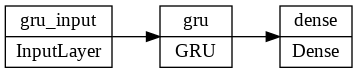

In [ ]:
tf.keras.utils.plot_model(
    model=model_gru, to_file="gru_model.png", show_shapes=False, rankdir="LR")

In [ ]:
early_stop = EarlyStopping(monitor='loss', patience=1, verbose=1)

hist_mice = model_gru.fit(X_train_t, y_train, epochs=100, 
                     batch_size=32, verbose=1, callbacks=[early_stop])

Epoch 1/100
1931/1931 [==============================] - 145s 74ms/step - loss: 2.1293 - mean_squared_error: 2.1293
Epoch 2/100
1931/1931 [==============================] - 144s 75ms/step - loss: 1.9758 - mean_squared_error: 1.9758
Epoch 3/100
1931/1931 [==============================] - 144s 75ms/step - loss: 1.8875 - mean_squared_error: 1.8875
Epoch 4/100
1931/1931 [==============================] - 145s 75ms/step - loss: 1.7496 - mean_squared_error: 1.7496
Epoch 5/100
1931/1931 [==============================] - 146s 76ms/step - loss: 1.5658 - mean_squared_error: 1.5658
Epoch 6/100
1931/1931 [==============================] - 144s 74ms/step - loss: 1.4054 - mean_squared_error: 1.4054
Epoch 7/100
1931/1931 [==============================] - 145s 75ms/step - loss: 1.2649 - mean_squared_error: 1.2649
Epoch 8/100
1931/1931 [==============================] - 143s 74ms/step - loss: 1.1498 - mean_squared_error: 1.1498
Epoch 9/100
1931/1931 [==============================] - 146s 76ms/step 

In [ ]:
GRU_pred = model_gru.predict(X_test_t)
y_pred = pd.DataFrame(GRU_pred[:,0])

In [ ]:
# evaluate : accuracy와 loss 알 수 있음
score = model_gru.evaluate(X_test_t, y_test, batch_size=32)
print('MSE = ', score)

483/483 [==============================] - 13s 27ms/step - loss: 0.5611 - mean_squared_error: 0.5611
MSE =  [0.5611022114753723, 0.5611022114753723]


In [ ]:
confirm_result(y_test,y_pred)

,Results
MAE,0.50837
RMSE,0.74907
R2,0.75498


## GRU2(256,32),Dense1,adam

In [ ]:
import tensorflow as tf
from keras.models import Sequential 
from keras.layers import Dense 
import keras.backend as K 
from keras.callbacks import EarlyStopping
from keras.layers.recurrent_v2 import GRU

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

K.clear_session()
    
model_gru = Sequential() # Sequeatial Model 
model_gru.add(GRU(units=256,input_shape=(30, 1),return_sequences=True))
model_gru.add(GRU(units=32))
model_gru.add(Dense(1)) # output = 1 
#model_gru.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error', 'r2_score'])
model_gru.compile(loss='mean_squared_error', optimizer='adam', metrics='mean_squared_error') 
model_gru.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 30, 256)           198912    
                                                                 
 gru_1 (GRU)                 (None, 32)                27840     
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 226,785
Trainable params: 226,785
Non-trainable params: 0
_________________________________________________________________


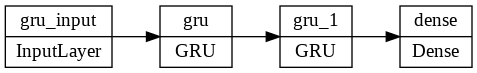

In [ ]:
tf.keras.utils.plot_model(
    model=model_gru, to_file="gru_model.png", show_shapes=False, rankdir="LR")

In [ ]:
early_stop = EarlyStopping(monitor='loss', patience=1, verbose=1)

hist_mice = model_gru.fit(X_train_t, y_train, epochs=100, 
                     batch_size=32, verbose=1, callbacks=[early_stop])

Epoch 1/100
1931/1931 [==============================] - 184s 93ms/step - loss: 2.0894 - mean_squared_error: 2.0894
Epoch 2/100
1931/1931 [==============================] - 174s 90ms/step - loss: 1.9278 - mean_squared_error: 1.9278
Epoch 3/100
1931/1931 [==============================] - 177s 92ms/step - loss: 1.7688 - mean_squared_error: 1.7688
Epoch 4/100
1931/1931 [==============================] - 178s 92ms/step - loss: 1.5820 - mean_squared_error: 1.5820
Epoch 5/100
1931/1931 [==============================] - 178s 92ms/step - loss: 1.4293 - mean_squared_error: 1.4293
Epoch 6/100
1931/1931 [==============================] - 176s 91ms/step - loss: 1.3026 - mean_squared_error: 1.3026
Epoch 7/100
1931/1931 [==============================] - 176s 91ms/step - loss: 1.1891 - mean_squared_error: 1.1891
Epoch 8/100
1931/1931 [==============================] - 176s 91ms/step - loss: 1.0764 - mean_squared_error: 1.0764
Epoch 9/100
1931/1931 [==============================] - 178s 92ms/step 

In [ ]:
GRU_pred = model_gru.predict(X_test_t)
y_pred = pd.DataFrame(GRU_pred[:,0])

In [ ]:
# evaluate : accuracy와 loss 알 수 있음
score = model_gru.evaluate(X_test_t, y_test, batch_size=32)
print('MSE = ', score)

483/483 [==============================] - 15s 30ms/step - loss: 0.5623 - mean_squared_error: 0.5623
MSE =  [0.5623498558998108, 0.5623498558998108]


In [ ]:
confirm_result(y_test,y_pred)

,Results
MAE,0.52039
RMSE,0.74990
R2,0.75443


## GRU2(256,128),Dense1,adam

In [ ]:
import tensorflow as tf
from keras.models import Sequential 
from keras.layers import Dense 
import keras.backend as K 
from keras.callbacks import EarlyStopping
from keras.layers.recurrent_v2 import GRU

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

K.clear_session()
    
model_gru = Sequential() # Sequeatial Model 
model_gru.add(GRU(units=256,input_shape=(30, 1),return_sequences=True))
model_gru.add(GRU(units=128))
model_gru.add(Dense(1)) # output = 1 
#model_gru.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error', 'r2_score'])
model_gru.compile(loss='mean_squared_error', optimizer='adam', metrics='mean_squared_error') 
model_gru.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 30, 256)           198912    
                                                                 
 gru_1 (GRU)                 (None, 128)               148224    
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 347,265
Trainable params: 347,265
Non-trainable params: 0
_________________________________________________________________


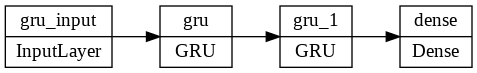

In [ ]:
tf.keras.utils.plot_model(
    model=model_gru, to_file="gru_model.png", show_shapes=False, rankdir="LR")

In [ ]:
early_stop = EarlyStopping(monitor='loss', patience=1, verbose=1)

hist_mice = model_gru.fit(X_train_t, y_train, epochs=100, 
                     batch_size=32, verbose=1, callbacks=[early_stop])

Epoch 1/100
1931/1931 [==============================] - 236s 121ms/step - loss: 2.1115 - mean_squared_error: 2.1115
Epoch 2/100
1931/1931 [==============================] - 233s 121ms/step - loss: 1.9497 - mean_squared_error: 1.9497
Epoch 3/100
1931/1931 [==============================] - 233s 121ms/step - loss: 1.7743 - mean_squared_error: 1.7743
Epoch 4/100
1931/1931 [==============================] - 232s 120ms/step - loss: 1.5682 - mean_squared_error: 1.5682
Epoch 5/100
1931/1931 [==============================] - 233s 121ms/step - loss: 1.4381 - mean_squared_error: 1.4381
Epoch 6/100
1931/1931 [==============================] - 232s 120ms/step - loss: 1.3115 - mean_squared_error: 1.3115
Epoch 7/100
1931/1931 [==============================] - 233s 121ms/step - loss: 1.1934 - mean_squared_error: 1.1934
Epoch 8/100
1931/1931 [==============================] - 233s 121ms/step - loss: 1.0805 - mean_squared_error: 1.0805
Epoch 9/100
1931/1931 [==============================] - 233s 12

In [ ]:
GRU_pred = model_gru.predict(X_test_t)
y_pred = pd.DataFrame(GRU_pred[:,0])

In [ ]:
# evaluate : accuracy와 loss 알 수 있음
score = model_gru.evaluate(X_test_t, y_test, batch_size=32)
print('MSE = ', score)

483/483 [==============================] - 20s 39ms/step - loss: 0.5501 - mean_squared_error: 0.5501
MSE =  [0.5501402020454407, 0.5501402020454407]


In [ ]:
confirm_result(y_test,y_pred)

,Results
MAE,0.51689
RMSE,0.74171
R2,0.75976


## GRU2(256,128),Dense1,RMSprop

In [14]:
import tensorflow as tf
from keras.models import Sequential 
from keras.layers import Dense 
import keras.backend as K 
from keras.callbacks import EarlyStopping
from keras.layers.recurrent_v2 import GRU

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

K.clear_session()
    
model_gru = Sequential() # Sequeatial Model 
model_gru.add(GRU(units=256,input_shape=(30, 1),return_sequences=True))
model_gru.add(GRU(units=128))
model_gru.add(Dense(1)) # output = 1 
#model_gru.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error', 'r2_score'])
model_gru.compile(loss='mean_squared_error', optimizer='RMSprop', metrics='mean_squared_error') 
model_gru.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 30, 256)           198912    
                                                                 
 gru_1 (GRU)                 (None, 128)               148224    
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 347,265
Trainable params: 347,265
Non-trainable params: 0
_________________________________________________________________


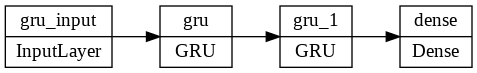

In [15]:
tf.keras.utils.plot_model(
    model=model_gru, to_file="gru_model.png", show_shapes=False, rankdir="LR")

In [ ]:
early_stop = EarlyStopping(monitor='loss', patience=1, verbose=1)

hist_mice = model_gru.fit(X_train_t, y_train, epochs=100, 
                     batch_size=32, verbose=1, callbacks=[early_stop])

Epoch 1/100
 138/1931 [=>............................] - ETA: 3:43 - loss: 2.5490 - mean_squared_error: 2.5490

In [ ]:
GRU_pred = model_gru.predict(X_test_t)
y_pred = pd.DataFrame(GRU_pred[:,0])

In [ ]:
# evaluate : accuracy와 loss 알 수 있음
score = model_gru.evaluate(X_test_t, y_test, batch_size=32)
print('MSE = ', score)

In [ ]:
confirm_result(y_test,y_pred)

## GRU2(256,256),Dense1,adam

In [ ]:
import tensorflow as tf
from keras.models import Sequential 
from keras.layers import Dense 
import keras.backend as K 
from keras.callbacks import EarlyStopping
from keras.layers.recurrent_v2 import GRU

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

K.clear_session()
    
model_gru = Sequential() # Sequeatial Model 
model_gru.add(GRU(units=256,input_shape=(30, 1),return_sequences=True))
model_gru.add(GRU(units=256))
model_gru.add(Dense(1)) # output = 1 
#model_gru.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error', 'r2_score'])
model_gru.compile(loss='mean_squared_error', optimizer='adam', metrics='mean_squared_error') 
model_gru.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 30, 256)           198912    
                                                                 
 gru_1 (GRU)                 (None, 256)               394752    
                                                                 
 dense (Dense)               (None, 1)                 257       
                                                                 
Total params: 593,921
Trainable params: 593,921
Non-trainable params: 0
_________________________________________________________________


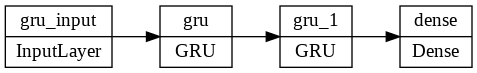

In [ ]:
tf.keras.utils.plot_model(
    model=model_gru, to_file="gru_model.png", show_shapes=False, rankdir="LR")

In [ ]:
early_stop = EarlyStopping(monitor='loss', patience=1, verbose=1)

hist_mice = model_gru.fit(X_train_t, y_train, epochs=100, 
                     batch_size=32, verbose=1, callbacks=[early_stop])

Epoch 1/100
1931/1931 [==============================] - 391s 200ms/step - loss: 2.2044 - mean_squared_error: 2.2044
Epoch 2/100
1931/1931 [==============================] - 359s 186ms/step - loss: 1.9637 - mean_squared_error: 1.9637
Epoch 3/100
1931/1931 [==============================] - 356s 185ms/step - loss: 1.8296 - mean_squared_error: 1.8296
Epoch 4/100
1931/1931 [==============================] - 362s 187ms/step - loss: 1.6546 - mean_squared_error: 1.6546
Epoch 5/100
1931/1931 [==============================] - 365s 189ms/step - loss: 1.4661 - mean_squared_error: 1.4661
Epoch 6/100
1931/1931 [==============================] - 364s 189ms/step - loss: 1.3128 - mean_squared_error: 1.3128
Epoch 7/100
1931/1931 [==============================] - 364s 188ms/step - loss: 1.1646 - mean_squared_error: 1.1646
Epoch 8/100
1931/1931 [==============================] - 362s 187ms/step - loss: 1.0349 - mean_squared_error: 1.0349
Epoch 9/100
1931/1931 [==============================] - 362s 18

In [ ]:
GRU_pred = model_gru.predict(X_test_t)
y_pred = pd.DataFrame(GRU_pred[:,0])

In [ ]:
# evaluate : accuracy와 loss 알 수 있음
score = model_gru.evaluate(X_test_t, y_test, batch_size=32)
print('MSE = ', score)

483/483 [==============================] - 29s 59ms/step - loss: 0.6743 - mean_squared_error: 0.6743
MSE =  [0.6743183732032776, 0.6743183732032776]


In [ ]:
confirm_result(y_test,y_pred)

,Results
MAE,0.59044
RMSE,0.82117
R2,0.70554


## GRU1(512),Dense1,adam - 0.52

In [ ]:
import tensorflow as tf
from keras.models import Sequential 
from keras.layers import Dense 
import keras.backend as K 
from keras.callbacks import EarlyStopping
from keras.layers.recurrent_v2 import GRU

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

K.clear_session()
    
model_gru = Sequential() # Sequeatial Model 
model_gru.add(GRU(units=512,input_shape=(30, 1)))
model_gru.add(Dense(1)) # output = 1 
#model_gru.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error', 'r2_score'])
model_gru.compile(loss='mean_squared_error', optimizer='adam', metrics='mean_squared_error') 
model_gru.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 512)               791040    
                                                                 
 dense (Dense)               (None, 1)                 513       
                                                                 
Total params: 791,553
Trainable params: 791,553
Non-trainable params: 0
_________________________________________________________________


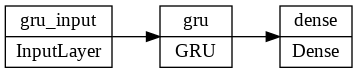

In [ ]:
tf.keras.utils.plot_model(
    model=model_gru, to_file="gru_model.png", show_shapes=False, rankdir="LR")

In [ ]:
early_stop = EarlyStopping(monitor='loss', patience=1, verbose=1)

hist_mice = model_gru.fit(X_train_t, y_train, epochs=100, 
                     batch_size=32, verbose=1, callbacks=[early_stop])

Epoch 1/100
1931/1931 [==============================] - 457s 235ms/step - loss: 2.2344 - mean_squared_error: 2.2344
Epoch 2/100
1931/1931 [==============================] - 449s 233ms/step - loss: 1.9862 - mean_squared_error: 1.9862
Epoch 3/100
1931/1931 [==============================] - 444s 230ms/step - loss: 1.8975 - mean_squared_error: 1.8975
Epoch 4/100
1931/1931 [==============================] - 454s 235ms/step - loss: 1.7376 - mean_squared_error: 1.7376
Epoch 5/100
1931/1931 [==============================] - 454s 235ms/step - loss: 1.5232 - mean_squared_error: 1.5232
Epoch 6/100
1931/1931 [==============================] - 450s 233ms/step - loss: 1.3503 - mean_squared_error: 1.3503
Epoch 7/100
1931/1931 [==============================] - 442s 229ms/step - loss: 1.2057 - mean_squared_error: 1.2057
Epoch 8/100
1931/1931 [==============================] - 448s 232ms/step - loss: 1.0500 - mean_squared_error: 1.0500
Epoch 9/100
1931/1931 [==============================] - 444s 23

In [ ]:
GRU_pred = model_gru.predict(X_test_t)
y_pred = pd.DataFrame(GRU_pred[:,0])

In [ ]:
# evaluate : accuracy와 loss 알 수 있음
score = model_gru.evaluate(X_test_t, y_test, batch_size=32)
print('MSE = ', score)

483/483 [==============================] - 31s 62ms/step - loss: 0.5314 - mean_squared_error: 0.5314
MSE =  [0.531387448310852, 0.531387448310852]


In [ ]:
confirm_result(y_test,y_pred)

,Results
MAE,0.48953
RMSE,0.72896
R2,0.76795


## GRU1,Dense3(128,64,32,1),Drop2,Adam

In [ ]:
import tensorflow as tf
from keras.models import Sequential 
from keras.layers import Dense 
import keras.backend as K 
from keras.callbacks import EarlyStopping
from keras.layers.recurrent_v2 import GRU

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

K.clear_session()
    
model_gru = Sequential() # Sequeatial Model 
model_gru.add(GRU(units=128,input_shape=(30, 1)))
model_gru.add(Dense(64))
model_gru.add(tf.keras.layers.Dropout(0.5))
model_gru.add(Dense(32))
model_gru.add(tf.keras.layers.Dropout(0.5))
model_gru.add(Dense(1)) # output = 1 
#model_gru.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error', 'r2_score'])
model_gru.compile(loss='mean_squared_error', optimizer='adam', metrics='mean_squared_error') 
model_gru.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 128)               50304     
                                                                 
 dense (Dense)               (None, 64)                8256      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 60,673
Trainable params: 60,673
Non-traina

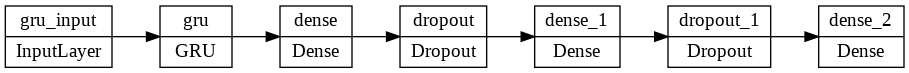

In [ ]:
tf.keras.utils.plot_model(
    model=model_gru, to_file="gru_model.png", show_shapes=False, rankdir="LR")

In [ ]:
early_stop = EarlyStopping(monitor='loss', patience=1, verbose=1)

hist_mice = model_gru.fit(X_train_t, y_train, epochs=100, 
                     batch_size=32, verbose=1, callbacks=[early_stop])

Epoch 1/100
1931/1931 [==============================] - 60s 30ms/step - loss: 2.4121 - mean_squared_error: 2.4121
Epoch 2/100
1931/1931 [==============================] - 57s 30ms/step - loss: 2.1020 - mean_squared_error: 2.1020
Epoch 3/100
1931/1931 [==============================] - 58s 30ms/step - loss: 2.0000 - mean_squared_error: 2.0000
Epoch 4/100
1931/1931 [==============================] - 57s 29ms/step - loss: 1.8878 - mean_squared_error: 1.8878
Epoch 5/100
1931/1931 [==============================] - 57s 30ms/step - loss: 1.7598 - mean_squared_error: 1.7598
Epoch 6/100
1931/1931 [==============================] - 57s 30ms/step - loss: 1.6533 - mean_squared_error: 1.6533
Epoch 7/100
1931/1931 [==============================] - 58s 30ms/step - loss: 1.5662 - mean_squared_error: 1.5662
Epoch 8/100
1931/1931 [==============================] - 58s 30ms/step - loss: 1.4804 - mean_squared_error: 1.4804
Epoch 9/100
1931/1931 [==============================] - 57s 29ms/step - loss: 1

In [ ]:
GRU_pred = model_gru.predict(X_test_t)
y_pred = pd.DataFrame(GRU_pred[:,0])

In [ ]:
# evaluate : accuracy와 loss 알 수 있음
score = model_gru.evaluate(X_test_t, y_test, batch_size=32)
print('MSE = ', score)

483/483 [==============================] - 5s 10ms/step - loss: 0.7105 - mean_squared_error: 0.7105
MSE =  [0.7105209231376648, 0.7105209231376648]


In [ ]:
confirm_result(y_test,y_pred)

,Results
MAE,0.64571
RMSE,0.84292
R2,0.68973


## GRU1,Dense3,(64,32,16,1),Drop1,Adam

In [ ]:
import tensorflow as tf
from keras.models import Sequential 
from keras.layers import Dense 
import keras.backend as K 
from keras.callbacks import EarlyStopping
from keras.layers.recurrent_v2 import GRU

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

K.clear_session()
    
model_gru = Sequential() # Sequeatial Model 
model_gru.add(GRU(units=64,input_shape=(30, 1)))
model_gru.add(Dense(32))
model_gru.add(tf.keras.layers.Dropout(0.5))
model_gru.add(Dense(16))
model_gru.add(Dense(1)) # output = 1 
#model_gru.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error', 'r2_score'])
model_gru.compile(loss='mean_squared_error', optimizer='adam', metrics='mean_squared_error') 
model_gru.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 64)                12864     
                                                                 
 dense (Dense)               (None, 32)                2080      
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 15,489
Trainable params: 15,489
Non-trainable params: 0
_________________________________________________________________


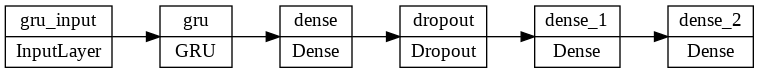

In [ ]:
tf.keras.utils.plot_model(
    model=model_gru, to_file="gru_model.png", show_shapes=False, rankdir="LR")

In [ ]:
early_stop = EarlyStopping(monitor='loss', patience=1, verbose=1)

hist_mice = model_gru.fit(X_train_t, y_train, epochs=100, 
                     batch_size=32, verbose=1, callbacks=[early_stop])

Epoch 1/100
1931/1931 [==============================] - 52s 26ms/step - loss: 2.3108 - mean_squared_error: 2.3108
Epoch 2/100
1931/1931 [==============================] - 35s 18ms/step - loss: 2.0157 - mean_squared_error: 2.0157
Epoch 3/100
1931/1931 [==============================] - 36s 18ms/step - loss: 1.9529 - mean_squared_error: 1.9529
Epoch 4/100
1931/1931 [==============================] - 35s 18ms/step - loss: 1.8790 - mean_squared_error: 1.8790
Epoch 5/100
1931/1931 [==============================] - 35s 18ms/step - loss: 1.8183 - mean_squared_error: 1.8183
Epoch 6/100
1931/1931 [==============================] - 37s 19ms/step - loss: 1.7177 - mean_squared_error: 1.7177
Epoch 7/100
1931/1931 [==============================] - 35s 18ms/step - loss: 1.6418 - mean_squared_error: 1.6418
Epoch 8/100
1931/1931 [==============================] - 35s 18ms/step - loss: 1.5701 - mean_squared_error: 1.5701
Epoch 9/100
1931/1931 [==============================] - 35s 18ms/step - loss: 1

In [ ]:
GRU_pred = model_gru.predict(X_test_t)
y_pred = pd.DataFrame(GRU_pred[:,0])

In [ ]:
# evaluate : accuracy와 loss 알 수 있음
score = model_gru.evaluate(X_test_t, y_test, batch_size=32)
print('MSE = ', score)

483/483 [==============================] - 4s 6ms/step - loss: 0.6704 - mean_squared_error: 0.6704
MSE =  [0.6703927516937256, 0.6703927516937256]


In [ ]:
confirm_result(y_test,y_pred)

,Results
MAE,0.59259
RMSE,0.81878
R2,0.70725


## GRU2(128,64),Dense1,Drop1,Adam

In [ ]:
import tensorflow as tf
from keras.models import Sequential 
from keras.layers import Dense 
import keras.backend as K 
from keras.callbacks import EarlyStopping
from keras.layers.recurrent_v2 import GRU

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

K.clear_session()
    
model_gru = Sequential() # Sequeatial Model 
model_gru.add(GRU(units=128,input_shape=(30, 1), return_sequences=True))
model_gru.add(GRU(64))
model_gru.add(tf.keras.layers.Dropout(0.5))
#model_gru.add(Dense(1, activation='sigmoid')) # output = 1
model_gru.add(Dense(1)) # output = 1
#model_gru.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error', 'r2_score'])
model_gru.compile(loss='mean_squared_error', optimizer='adam', metrics='mean_squared_error') 
model_gru.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 30, 128)           50304     
                                                                 
 gru_1 (GRU)                 (None, 64)                37248     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 87,617
Trainable params: 87,617
Non-trainable params: 0
_________________________________________________________________


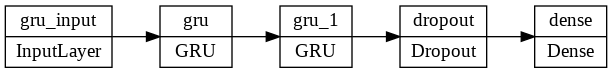

In [ ]:
tf.keras.utils.plot_model(
    model=model_gru, to_file="gru_model.png", show_shapes=False, rankdir="LR")

In [ ]:
early_stop = EarlyStopping(monitor='loss', patience=1, verbose=1)

hist_mice = model_gru.fit(X_train_t, y_train, epochs=100, 
                     batch_size=32, verbose=1, callbacks=[early_stop])

Epoch 1/100
1931/1931 [==============================] - 98s 49ms/step - loss: 2.1935 - mean_squared_error: 2.1935
Epoch 2/100
1931/1931 [==============================] - 94s 49ms/step - loss: 2.0326 - mean_squared_error: 2.0326
Epoch 3/100
1931/1931 [==============================] - 95s 49ms/step - loss: 1.9305 - mean_squared_error: 1.9305
Epoch 4/100
1931/1931 [==============================] - 94s 49ms/step - loss: 1.7916 - mean_squared_error: 1.7916
Epoch 5/100
1931/1931 [==============================] - 95s 49ms/step - loss: 1.6375 - mean_squared_error: 1.6375
Epoch 6/100
1931/1931 [==============================] - 96s 50ms/step - loss: 1.5308 - mean_squared_error: 1.5308
Epoch 7/100
1931/1931 [==============================] - 97s 50ms/step - loss: 1.4472 - mean_squared_error: 1.4472
Epoch 8/100
1931/1931 [==============================] - 95s 49ms/step - loss: 1.3548 - mean_squared_error: 1.3548
Epoch 9/100
1931/1931 [==============================] - 95s 49ms/step - loss: 1

In [ ]:
GRU_pred = model_gru.predict(X_test_t)
y_pred = pd.DataFrame(GRU_pred[:,0])

In [ ]:
# evaluate : accuracy와 loss 알 수 있음
score = model_gru.evaluate(X_test_t, y_test, batch_size=32)
print('MSE = ', score)

483/483 [==============================] - 8s 15ms/step - loss: 0.6381 - mean_squared_error: 0.6381
MSE =  [0.6381200551986694, 0.6381200551986694]


In [ ]:
confirm_result(y_test,y_pred)

,Results
MAE,0.57139
RMSE,0.79882
R2,0.72134


## GRU2(128,64),Dense2(128,1),Drop1,Adam

In [ ]:
import tensorflow as tf
from keras.models import Sequential 
from keras.layers import Dense 
import keras.backend as K 
from keras.callbacks import EarlyStopping
from keras.layers.recurrent_v2 import GRU

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

K.clear_session()
    
model_gru = Sequential() # Sequeatial Model 
model_gru.add(GRU(units=128,input_shape=(30, 1), return_sequences=True))
model_gru.add(Dense(128)) # output = 1|
model_gru.add(tf.keras.layers.Dropout(0.5))
model_gru.add(GRU(64))
model_gru.add(Dense(1)) # output = 1
#model_gru.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error', 'r2_score'])
model_gru.compile(loss='mean_squared_error', optimizer='adam', metrics='mean_squared_error') 
model_gru.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 30, 128)           50304     
                                                                 
 dense (Dense)               (None, 30, 128)           16512     
                                                                 
 dropout (Dropout)           (None, 30, 128)           0         
                                                                 
 gru_1 (GRU)                 (None, 64)                37248     
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 104,129
Trainable params: 104,129
Non-trainable params: 0
_________________________________________________________________


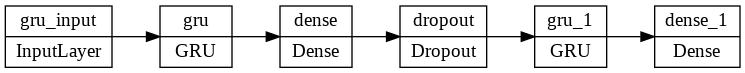

In [ ]:
tf.keras.utils.plot_model(
    model=model_gru, to_file="gru_model.png", show_shapes=False, rankdir="LR")

In [ ]:
early_stop = EarlyStopping(monitor='loss', patience=1, verbose=1)

hist_mice = model_gru.fit(X_train_t, y_train, epochs=100, 
                     batch_size=32, verbose=1, callbacks=[early_stop])

Epoch 1/100
1931/1931 [==============================] - 114s 56ms/step - loss: 2.1386 - mean_squared_error: 2.1386
Epoch 2/100
1931/1931 [==============================] - 130s 67ms/step - loss: 1.9645 - mean_squared_error: 1.9645
Epoch 3/100
1931/1931 [==============================] - 132s 68ms/step - loss: 1.8851 - mean_squared_error: 1.8851
Epoch 4/100
1931/1931 [==============================] - 112s 58ms/step - loss: 1.7412 - mean_squared_error: 1.7412
Epoch 5/100
1931/1931 [==============================] - 110s 57ms/step - loss: 1.5321 - mean_squared_error: 1.5321
Epoch 6/100
1931/1931 [==============================] - 109s 56ms/step - loss: 1.3513 - mean_squared_error: 1.3513
Epoch 7/100
1931/1931 [==============================] - 109s 56ms/step - loss: 1.2406 - mean_squared_error: 1.2406
Epoch 8/100
1931/1931 [==============================] - 108s 56ms/step - loss: 1.1678 - mean_squared_error: 1.1678
Epoch 9/100
1931/1931 [==============================] - 107s 55ms/step 

In [ ]:
GRU_pred = model_gru.predict(X_test_t)
y_pred = pd.DataFrame(GRU_pred[:,0])

In [ ]:
# evaluate : accuracy와 loss 알 수 있음
score = model_gru.evaluate(X_test_t, y_test, batch_size=32)
print('MSE = ', score)

483/483 [==============================] - 8s 16ms/step - loss: 0.7009 - mean_squared_error: 0.7009
MSE =  [0.7008790373802185, 0.7008790373802185]


In [ ]:
confirm_result(y_test,y_pred)

,Results
MAE,0.59287
RMSE,0.83718
R2,0.69394


## GRU1,Dense1,**RMSprop**

In [ ]:
import tensorflow as tf
from keras.models import Sequential 
from keras.layers import Dense 
import keras.backend as K 
from keras.callbacks import EarlyStopping
from keras.layers.recurrent_v2 import GRU

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

K.clear_session()
    
model_gru = Sequential() # Sequeatial Model 
model_gru.add(GRU(units=128,input_shape=(30, 1)))
model_gru.add(Dense(1)) # output = 1 
#model_gru.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error', 'r2_score'])
model_gru.compile(loss='mean_squared_error', optimizer='RMSprop') 
model_gru.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 128)               50304     
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 50,433
Trainable params: 50,433
Non-trainable params: 0
_________________________________________________________________


In [ ]:
early_stop = EarlyStopping(monitor='loss', patience=1, verbose=1)

hist_mice = model_gru.fit(X_train_t, y_train, epochs=100, 
                     batch_size=32, verbose=1, callbacks=[early_stop])

Epoch 1/100
1931/1931 [==============================] - 59s 29ms/step - loss: 2.1397
Epoch 2/100
1931/1931 [==============================] - 56s 29ms/step - loss: 1.9463
Epoch 3/100
1931/1931 [==============================] - 56s 29ms/step - loss: 1.8100
Epoch 4/100
1931/1931 [==============================] - 56s 29ms/step - loss: 1.6727
Epoch 5/100
1931/1931 [==============================] - 56s 29ms/step - loss: 1.5613
Epoch 6/100
1931/1931 [==============================] - 55s 29ms/step - loss: 1.4700
Epoch 7/100
1931/1931 [==============================] - 56s 29ms/step - loss: 1.3861
Epoch 8/100
1931/1931 [==============================] - 56s 29ms/step - loss: 1.3104
Epoch 9/100
1931/1931 [==============================] - 56s 29ms/step - loss: 1.2324
Epoch 10/100
1931/1931 [==============================] - 56s 29ms/step - loss: 1.1637
Epoch 11/100
1931/1931 [==============================] - 56s 29ms/step - loss: 1.0998
Epoch 12/100
1931/1931 [============================

In [ ]:
GRU_pred = model_gru.predict(X_test_t)
y_pred = pd.DataFrame(GRU_pred[:,0])

In [ ]:
# evaluate : accuracy와 loss 알 수 있음
score = model_gru.evaluate(X_test_t, y_test, batch_size=32)
print('MSE = ', score)

483/483 [==============================] - 5s 9ms/step - loss: 0.6134
MSE =  0.6134480834007263


In [ ]:
confirm_result(y_test,y_pred)

,Results
MAE,0.54935
RMSE,0.78323
R2,0.73212


#LSTM

##LSTM1,Dense1,adam

In [ ]:
import tensorflow as tf
from keras.layers import LSTM 
from keras.models import Sequential 
from keras.layers import Dense 
import keras.backend as K 
from keras.callbacks import EarlyStopping

K.clear_session()
    
model_lstm = Sequential() # Sequeatial Model
model_lstm.add(LSTM(128, input_shape=(30, 1))) # (timestep, feature)
#model.add(Dense(10)) 
model_lstm.add(Dense(1)) # output = 1 
# model_lstm.compile(loss='mean_squared_error', optimizer='RMSprop') 
model_lstm.compile(loss='mean_squared_error', optimizer='adam', metrics='mean_squared_error') 
model_lstm.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 128)               66560     
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 66,689
Trainable params: 66,689
Non-trainable params: 0
_________________________________________________________________


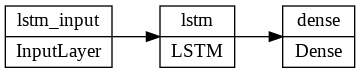

In [ ]:
tf.keras.utils.plot_model(
    model=model_lstm, to_file="lstm_model.png", show_shapes=False, rankdir="LR")

In [ ]:
early_stop = EarlyStopping(monitor='loss', patience=1, verbose=1)

model_lstm.fit(X_train_t, y_train, epochs=100,
          batch_size=32, verbose=1, callbacks=[early_stop])

Epoch 1/100
1931/1931 [==============================] - 84s 39ms/step - loss: 2.1653 - mean_squared_error: 2.1653
Epoch 2/100
1931/1931 [==============================] - 61s 32ms/step - loss: 1.9729 - mean_squared_error: 1.9729
Epoch 3/100
1931/1931 [==============================] - 60s 31ms/step - loss: 1.8665 - mean_squared_error: 1.8665
Epoch 4/100
1931/1931 [==============================] - 59s 31ms/step - loss: 1.7683 - mean_squared_error: 1.7683
Epoch 5/100
1931/1931 [==============================] - 61s 31ms/step - loss: 1.6584 - mean_squared_error: 1.6584
Epoch 6/100
1931/1931 [==============================] - 59s 31ms/step - loss: 1.5715 - mean_squared_error: 1.5715
Epoch 7/100
1931/1931 [==============================] - 59s 31ms/step - loss: 1.4845 - mean_squared_error: 1.4845
Epoch 8/100
1931/1931 [==============================] - 60s 31ms/step - loss: 1.3825 - mean_squared_error: 1.3825
Epoch 9/100
1931/1931 [==============================] - 59s 31ms/step - loss: 1

In [ ]:
LSTM_pred = model_lstm.predict(X_test_t)
y_pred = pd.DataFrame(LSTM_pred[:,0])

In [ ]:
score = model_lstm.evaluate(X_test_t, y_test, batch_size=32)
print(score)

483/483 [==============================] - 6s 11ms/step - loss: 0.6459 - mean_squared_error: 0.6459
[0.6458579897880554, 0.6458579897880554]


In [ ]:
confirm_result(y_test,y_pred)

,Results
MAE,0.57157
RMSE,0.80365
R2,0.71797


##LSTM2(128,32),Dense1,adam

In [ ]:
import tensorflow as tf
from keras.layers import LSTM 
from keras.models import Sequential 
from keras.layers import Dense 
import keras.backend as K 
from keras.callbacks import EarlyStopping

K.clear_session()
    
model_lstm = Sequential() # Sequeatial Model
model_lstm.add(LSTM(128, input_shape=(30, 1), return_sequences=True)) # (timestep, feature)
model_lstm.add(LSTM(32)) # (timestep, feature)
#model.add(Dense(10)) 
model_lstm.add(Dense(1)) # output = 1 
# model_lstm.compile(loss='mean_squared_error', optimizer='RMSprop') 
model_lstm.compile(loss='mean_squared_error', optimizer='adam', metrics='mean_squared_error') 
model_lstm.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 30, 128)           66560     
                                                                 
 lstm_1 (LSTM)               (None, 32)                20608     
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 87,201
Trainable params: 87,201
Non-trainable params: 0
_________________________________________________________________


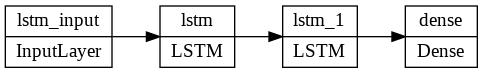

In [ ]:
tf.keras.utils.plot_model(
    model=model_lstm, to_file="lstm_model.png", show_shapes=False, rankdir="LR")

In [ ]:
early_stop = EarlyStopping(monitor='loss', patience=1, verbose=1)

model_lstm.fit(X_train_t, y_train, epochs=100,
          batch_size=32, verbose=1, callbacks=[early_stop])

Epoch 1/100
1931/1931 [==============================] - 109s 54ms/step - loss: 2.1961 - mean_squared_error: 2.1961
Epoch 2/100
1931/1931 [==============================] - 91s 47ms/step - loss: 1.9841 - mean_squared_error: 1.9841
Epoch 3/100
1931/1931 [==============================] - 92s 48ms/step - loss: 1.8725 - mean_squared_error: 1.8725
Epoch 4/100
1931/1931 [==============================] - 91s 47ms/step - loss: 1.7512 - mean_squared_error: 1.7512
Epoch 5/100
1931/1931 [==============================] - 90s 47ms/step - loss: 1.6561 - mean_squared_error: 1.6561
Epoch 6/100
1931/1931 [==============================] - 90s 47ms/step - loss: 1.5761 - mean_squared_error: 1.5761
Epoch 7/100
1931/1931 [==============================] - 91s 47ms/step - loss: 1.4816 - mean_squared_error: 1.4816
Epoch 8/100
1931/1931 [==============================] - 91s 47ms/step - loss: 1.3396 - mean_squared_error: 1.3396
Epoch 9/100
1931/1931 [==============================] - 91s 47ms/step - loss: 

In [ ]:
LSTM_pred = model_lstm.predict(X_test_t)
y_pred = pd.DataFrame(LSTM_pred[:,0])

In [ ]:
score = model_lstm.evaluate(X_test_t, y_test, batch_size=32)
print(score)

483/483 [==============================] - 8s 17ms/step - loss: 0.6286 - mean_squared_error: 0.6286
[0.6285678148269653, 0.6285678148269653]


In [ ]:
confirm_result(y_test,y_pred)

,Results
MAE,0.54090
RMSE,0.79282
R2,0.72552


##LSTM1(256),Dense1,adam

In [ ]:
import tensorflow as tf
from keras.layers import LSTM 
from keras.models import Sequential 
from keras.layers import Dense 
import keras.backend as K 
from keras.callbacks import EarlyStopping

K.clear_session()
    
model_lstm = Sequential() # Sequeatial Model
model_lstm.add(LSTM(256, input_shape=(30, 1))) # (timestep, feature)
#model.add(Dense(10)) 
model_lstm.add(Dense(1)) # output = 1 
# model_lstm.compile(loss='mean_squared_error', optimizer='RMSprop') 
model_lstm.compile(loss='mean_squared_error', optimizer='adam', metrics='mean_squared_error') 
model_lstm.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 256)               264192    
                                                                 
 dense (Dense)               (None, 1)                 257       
                                                                 
Total params: 264,449
Trainable params: 264,449
Non-trainable params: 0
_________________________________________________________________


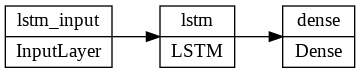

In [ ]:
tf.keras.utils.plot_model(
    model=model_lstm, to_file="lstm_model.png", show_shapes=False, rankdir="LR")

In [ ]:
early_stop = EarlyStopping(monitor='loss', patience=1, verbose=1)

model_lstm.fit(X_train_t, y_train, epochs=100,
          batch_size=32, verbose=1, callbacks=[early_stop])

Epoch 1/100
1931/1931 [==============================] - 202s 104ms/step - loss: 2.1289 - mean_squared_error: 2.1289
Epoch 2/100
1931/1931 [==============================] - 183s 95ms/step - loss: 1.9559 - mean_squared_error: 1.9559
Epoch 3/100
1931/1931 [==============================] - 181s 94ms/step - loss: 1.8395 - mean_squared_error: 1.8395
Epoch 4/100
1931/1931 [==============================] - 181s 94ms/step - loss: 1.6932 - mean_squared_error: 1.6932
Epoch 5/100
1931/1931 [==============================] - 184s 95ms/step - loss: 1.5914 - mean_squared_error: 1.5914
Epoch 6/100
1931/1931 [==============================] - 186s 97ms/step - loss: 1.4795 - mean_squared_error: 1.4795
Epoch 7/100
1931/1931 [==============================] - 182s 94ms/step - loss: 1.3605 - mean_squared_error: 1.3605
Epoch 8/100
1931/1931 [==============================] - 181s 94ms/step - loss: 1.2229 - mean_squared_error: 1.2229
Epoch 9/100
1931/1931 [==============================] - 182s 94ms/step

In [ ]:
LSTM_pred = model_lstm.predict(X_test_t)
y_pred = pd.DataFrame(LSTM_pred[:,0])

In [ ]:
score = model_lstm.evaluate(X_test_t, y_test, batch_size=32)
print(score)

483/483 [==============================] - 15s 30ms/step - loss: 0.4942 - mean_squared_error: 0.4942
[0.4942288100719452, 0.4942288100719452]


In [ ]:
confirm_result(y_test,y_pred)

,Results
MAE,0.46649
RMSE,0.70301
R2,0.78418


##LSTM2(256,32),Dense1,adam

In [ ]:
import tensorflow as tf
from keras.layers import LSTM 
from keras.models import Sequential 
from keras.layers import Dense 
import keras.backend as K 
from keras.callbacks import EarlyStopping

K.clear_session()
    
model_lstm = Sequential() # Sequeatial Model
model_lstm.add(LSTM(256, input_shape=(30, 1),return_sequences=True)) # (timestep, feature)
model_lstm.add(LSTM(units=32))
model_lstm.add(Dense(1)) # output = 1 
# model_lstm.compile(loss='mean_squared_error', optimizer='RMSprop') 
model_lstm.compile(loss='mean_squared_error', optimizer='adam', metrics='mean_squared_error') 
model_lstm.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 30, 256)           264192    
                                                                 
 lstm_1 (LSTM)               (None, 32)                36992     
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 301,217
Trainable params: 301,217
Non-trainable params: 0
_________________________________________________________________


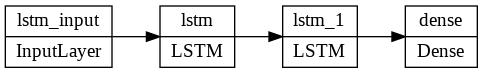

In [ ]:
tf.keras.utils.plot_model(
    model=model_lstm, to_file="lstm_model.png", show_shapes=False, rankdir="LR")

In [ ]:
early_stop = EarlyStopping(monitor='loss', patience=1, verbose=1)

model_lstm.fit(X_train_t, y_train, epochs=100,
          batch_size=32, verbose=1, callbacks=[early_stop])

Epoch 1/100
1931/1931 [==============================] - 256s 128ms/step - loss: 2.2420 - mean_squared_error: 2.2420
Epoch 2/100
1931/1931 [==============================] - 240s 124ms/step - loss: 2.0536 - mean_squared_error: 2.0536
Epoch 3/100
1931/1931 [==============================] - 238s 123ms/step - loss: 1.9519 - mean_squared_error: 1.9519
Epoch 4/100
1931/1931 [==============================] - 240s 124ms/step - loss: 1.8253 - mean_squared_error: 1.8253
Epoch 5/100
1931/1931 [==============================] - 238s 123ms/step - loss: 1.6543 - mean_squared_error: 1.6543
Epoch 6/100
1931/1931 [==============================] - 235s 122ms/step - loss: 1.5214 - mean_squared_error: 1.5214
Epoch 7/100
1931/1931 [==============================] - 233s 121ms/step - loss: 1.3300 - mean_squared_error: 1.3300
Epoch 8/100
1931/1931 [==============================] - 233s 121ms/step - loss: 1.1688 - mean_squared_error: 1.1688
Epoch 9/100
1931/1931 [==============================] - 235s 12

In [ ]:
LSTM_pred = model_lstm.predict(X_test_t)
y_pred = pd.DataFrame(LSTM_pred[:,0])

In [ ]:
score = model_lstm.evaluate(X_test_t, y_test, batch_size=32)
print(score)

483/483 [==============================] - 21s 43ms/step - loss: 0.4888 - mean_squared_error: 0.4888
[0.48875758051872253, 0.48875758051872253]


In [ ]:
confirm_result(y_test,y_pred)

,Results
MAE,0.45792
RMSE,0.69911
R2,0.78657


##LSTM2(256,128),Dense1,adam

In [ ]:
import tensorflow as tf
from keras.layers import LSTM 
from keras.models import Sequential 
from keras.layers import Dense 
import keras.backend as K 
from keras.callbacks import EarlyStopping

K.clear_session()
    
model_lstm = Sequential() # Sequeatial Model
model_lstm.add(LSTM(256, input_shape=(30, 1),return_sequences=True)) # (timestep, feature)
model_lstm.add(LSTM(units=128))
model_lstm.add(Dense(1)) # output = 1 
# model_lstm.compile(loss='mean_squared_error', optimizer='RMSprop') 
model_lstm.compile(loss='mean_squared_error', optimizer='adam', metrics='mean_squared_error') 
model_lstm.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 30, 256)           264192    
                                                                 
 lstm_1 (LSTM)               (None, 128)               197120    
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 461,441
Trainable params: 461,441
Non-trainable params: 0
_________________________________________________________________


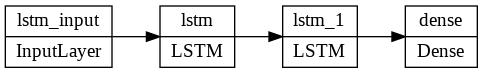

In [ ]:
tf.keras.utils.plot_model(
    model=model_lstm, to_file="lstm_model.png", show_shapes=False, rankdir="LR")

In [ ]:
early_stop = EarlyStopping(monitor='loss', patience=1, verbose=1)

model_lstm.fit(X_train_t, y_train, epochs=100,
          batch_size=32, verbose=1, callbacks=[early_stop])

Epoch 1/100
1931/1931 [==============================] - 312s 157ms/step - loss: 2.1047 - mean_squared_error: 2.1047
Epoch 2/100
1931/1931 [==============================] - 302s 156ms/step - loss: 1.9456 - mean_squared_error: 1.9456
Epoch 3/100
1931/1931 [==============================] - 305s 158ms/step - loss: 1.8178 - mean_squared_error: 1.8178
Epoch 4/100
1931/1931 [==============================] - 307s 159ms/step - loss: 1.6781 - mean_squared_error: 1.6781
Epoch 5/100
1931/1931 [==============================] - 305s 158ms/step - loss: 1.5603 - mean_squared_error: 1.5603
Epoch 6/100
1931/1931 [==============================] - 307s 159ms/step - loss: 1.4158 - mean_squared_error: 1.4158
Epoch 7/100
1931/1931 [==============================] - 304s 157ms/step - loss: 1.2418 - mean_squared_error: 1.2418
Epoch 8/100
1931/1931 [==============================] - 304s 157ms/step - loss: 1.1351 - mean_squared_error: 1.1351
Epoch 9/100
1931/1931 [==============================] - 302s 15

In [ ]:
LSTM_pred = model_lstm.predict(X_test_t)
y_pred = pd.DataFrame(LSTM_pred[:,0])

In [ ]:
score = model_lstm.evaluate(X_test_t, y_test, batch_size=32)
print(score)

483/483 [==============================] - 25s 49ms/step - loss: 0.4953 - mean_squared_error: 0.4953
[0.49530327320098877, 0.49530327320098877]


In [ ]:
confirm_result(y_test,y_pred)

,Results
MAE,0.45629
RMSE,0.70378
R2,0.78371


##LSTM1(512),Dense1,adam

In [ ]:
import tensorflow as tf
from keras.layers import LSTM 
from keras.models import Sequential 
from keras.layers import Dense 
import keras.backend as K 
from keras.callbacks import EarlyStopping

K.clear_session()
    
model_lstm = Sequential() # Sequeatial Model
model_lstm.add(LSTM(512, input_shape=(30, 1))) # (timestep, feature)
#model.add(Dense(10)) 
model_lstm.add(Dense(1)) # output = 1 
# model_lstm.compile(loss='mean_squared_error', optimizer='RMSprop') 
model_lstm.compile(loss='mean_squared_error', optimizer='adam', metrics='mean_squared_error') 
model_lstm.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 512)               1052672   
                                                                 
 dense (Dense)               (None, 1)                 513       
                                                                 
Total params: 1,053,185
Trainable params: 1,053,185
Non-trainable params: 0
_________________________________________________________________


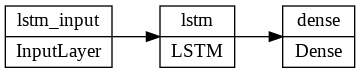

In [ ]:
tf.keras.utils.plot_model(
    model=model_lstm, to_file="lstm_model.png", show_shapes=False, rankdir="LR")

In [ ]:
early_stop = EarlyStopping(monitor='loss', patience=1, verbose=1)

model_lstm.fit(X_train_t, y_train, epochs=100,
          batch_size=32, verbose=1, callbacks=[early_stop])

Epoch 1/100
1931/1931 [==============================] - 688s 355ms/step - loss: 2.1150 - mean_squared_error: 2.1150
Epoch 2/100
1931/1931 [==============================] - 679s 352ms/step - loss: 1.9206 - mean_squared_error: 1.9206
Epoch 3/100
1931/1931 [==============================] - 673s 348ms/step - loss: 1.7840 - mean_squared_error: 1.7840
Epoch 4/100
1931/1931 [==============================] - 692s 359ms/step - loss: 1.6467 - mean_squared_error: 1.6467
Epoch 5/100
1931/1931 [==============================] - 694s 359ms/step - loss: 1.5329 - mean_squared_error: 1.5329
Epoch 6/100
1931/1931 [==============================] - 696s 360ms/step - loss: 1.3989 - mean_squared_error: 1.3989
Epoch 7/100
1931/1931 [==============================] - 700s 362ms/step - loss: 1.2531 - mean_squared_error: 1.2531
Epoch 8/100
1931/1931 [==============================] - 695s 360ms/step - loss: 1.1128 - mean_squared_error: 1.1128
Epoch 9/100
1931/1931 [==============================] - 700s 36

In [ ]:
LSTM_pred = model_lstm.predict(X_test_t)
y_pred = pd.DataFrame(LSTM_pred[:,0])

In [ ]:
score = model_lstm.evaluate(X_test_t, y_test, batch_size=32)
print(score)

483/483 [==============================] - 35s 70ms/step - loss: 0.4993 - mean_squared_error: 0.4993
[0.4993188679218292, 0.4993188679218292]


In [ ]:
confirm_result(y_test,y_pred)

,Results
MAE,0.45948
RMSE,0.70663
R2,0.78196


##LSTM1,Dense1,RMSprop

In [ ]:
import tensorflow as tf
from keras.layers import LSTM 
from keras.models import Sequential 
from keras.layers import Dense 
import keras.backend as K 
from keras.callbacks import EarlyStopping

K.clear_session()
    
model_lstm = Sequential() # Sequeatial Model
model_lstm.add(LSTM(128, input_shape=(30, 1))) # (timestep, feature)
#model.add(Dense(10)) 
model_lstm.add(Dense(1)) # output = 1 
model_lstm.compile(loss='mean_squared_error', optimizer='RMSprop') 
#model_lstm.compile(loss='mean_squared_error', optimizer='adam', metrics='mean_squared_error') 
model_lstm.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 128)               66560     
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 66,689
Trainable params: 66,689
Non-trainable params: 0
_________________________________________________________________


In [ ]:
early_stop = EarlyStopping(monitor='loss', patience=1, verbose=1)

model_lstm.fit(X_train_t, y_train, epochs=100,
          batch_size=32, verbose=1, callbacks=[early_stop])

Epoch 1/100
1931/1931 [==============================] - 62s 31ms/step - loss: 2.1334
Epoch 2/100
1931/1931 [==============================] - 68s 35ms/step - loss: 1.9819
Epoch 3/100
1931/1931 [==============================] - 81s 42ms/step - loss: 1.8896
Epoch 4/100
1931/1931 [==============================] - 61s 31ms/step - loss: 1.7860
Epoch 5/100
1931/1931 [==============================] - 75s 39ms/step - loss: 1.6695
Epoch 6/100
1931/1931 [==============================] - 61s 31ms/step - loss: 1.5756
Epoch 7/100
1931/1931 [==============================] - 60s 31ms/step - loss: 1.4890
Epoch 8/100
1931/1931 [==============================] - 61s 31ms/step - loss: 1.4203
Epoch 9/100
1931/1931 [==============================] - 60s 31ms/step - loss: 1.3556
Epoch 10/100
1931/1931 [==============================] - 60s 31ms/step - loss: 1.2929
Epoch 11/100
1931/1931 [==============================] - 60s 31ms/step - loss: 1.2311
Epoch 12/100
1931/1931 [============================

In [ ]:
LSTM_pred = model_lstm.predict(X_test_t)
y_pred = pd.DataFrame(LSTM_pred[:,0])

In [ ]:
score = model_lstm.evaluate(X_test_t, y_test, batch_size=32)
print(score)

483/483 [==============================] - 6s 11ms/step - loss: 0.6420
0.6420155167579651


In [ ]:
confirm_result(y_test,y_pred)

,Results
MAE,0.57135
RMSE,0.80126
R2,0.71964


# AdaBoostGRU

##AdaBoostGRU(128),Dense1(tree2)

In [ ]:
!pip install scikeras

  Attempting uninstall: importlib-metadata
    Found existing installation: importlib-metadata 4.11.0
    Uninstalling importlib-metadata-4.11.0:
      Successfully uninstalled importlib-metadata-4.11.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
markdown 3.3.6 requires importlib-metadata>=4.4; python_version < "3.10", but you have importlib-metadata 3.10.1 which is incompatible.


In [ ]:
import tensorflow as tf
from keras.models import Sequential 
from keras.layers import Dense 
import keras.backend as K 
from keras.callbacks import EarlyStopping
from keras.layers.recurrent_v2 import GRU

#from keras.wrappers.scikit_learn import KerasRegressor
from scikeras.wrappers import KerasRegressor
from sklearn.ensemble import AdaBoostRegressor

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

K.clear_session()
    
model_gru = Sequential() # Sequeatial Model 
model_gru.add(GRU(units=128,input_shape=(30, 1)))
model_gru.add(Dense(1)) # output = 1 
#model_gru.compile(loss='mean_squared_error', optimizer='RMSprop')
model_gru.compile(loss='mean_squared_error', optimizer='adam', metrics='mean_squared_error') 
model_gru.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 128)               50304     
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 50,433
Trainable params: 50,433
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#kerasRegressor로 분류기 만든 뒤, AdaBoostRegressor로 최종 결합
GRU_Predictors = KerasRegressor(build_fn=lambda:model_gru, epochs=100, batch_size=32)
model_adaboostgru = AdaBoostRegressor(GRU_Predictors, n_estimators=2, random_state=42)

In [ ]:
early_stop = EarlyStopping(monitor='loss', patience=1, verbose=1)

model_adaboostgru.fit(X_train_t, y_train)

/usr/local/lib/python3.7/dist-packages/scikeras/wrappers.py:290: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  "``build_fn`` will be renamed to ``model`` in a future release,"


Epoch 1/100
1931/1931 [==============================] - 79s 35ms/step - loss: 2.1299 - mean_squared_error: 2.1299
Epoch 2/100
1931/1931 [==============================] - 55s 28ms/step - loss: 1.9499 - mean_squared_error: 1.9499
Epoch 3/100
1931/1931 [==============================] - 51s 27ms/step - loss: 1.8487 - mean_squared_error: 1.8487
Epoch 4/100
1931/1931 [==============================] - 54s 28ms/step - loss: 1.6908 - mean_squared_error: 1.6908
Epoch 5/100
1931/1931 [==============================] - 51s 27ms/step - loss: 1.5332 - mean_squared_error: 1.5332
Epoch 6/100
1931/1931 [==============================] - 52s 27ms/step - loss: 1.3914 - mean_squared_error: 1.3914
Epoch 7/100
1931/1931 [==============================] - 52s 27ms/step - loss: 1.2451 - mean_squared_error: 1.2451
Epoch 8/100
1931/1931 [==============================] - 52s 27ms/step - loss: 1.1323 - mean_squared_error: 1.1323
Epoch 9/100
1931/1931 [==============================] - 52s 27ms/step - loss: 1

/usr/local/lib/python3.7/dist-packages/scikeras/wrappers.py:290: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  "``build_fn`` will be renamed to ``model`` in a future release,"


1931/1931 [==============================] - 53s 27ms/step - loss: 0.6577 - mean_squared_error: 0.6577
Epoch 2/100
1931/1931 [==============================] - 53s 27ms/step - loss: 0.5435 - mean_squared_error: 0.5435
Epoch 3/100
1931/1931 [==============================] - 53s 27ms/step - loss: 0.4940 - mean_squared_error: 0.4940
Epoch 4/100
1931/1931 [==============================] - 61s 32ms/step - loss: 0.4840 - mean_squared_error: 0.4840
Epoch 5/100
1931/1931 [==============================] - 52s 27ms/step - loss: 0.4596 - mean_squared_error: 0.4596
Epoch 6/100
1931/1931 [==============================] - 53s 27ms/step - loss: 0.4365 - mean_squared_error: 0.4365
Epoch 7/100
1931/1931 [==============================] - 54s 28ms/step - loss: 0.4325 - mean_squared_error: 0.4325
Epoch 8/100
1931/1931 [==============================] - 54s 28ms/step - loss: 0.4217 - mean_squared_error: 0.4217
Epoch 9/100
1931/1931 [==============================] - 54s 28ms/step - loss: 0.4066 - mean

AdaBoostRegressor(base_estimator=KerasRegressor(batch_size=32, build_fn=<function <lambda> at 0x7fc06d53bb00>, epochs=100),
                  n_estimators=2, random_state=42)

In [ ]:
score = model_adaboostgru.score(X_test_t, y_test)
print(score)

483/483 [==============================] - 6s 11ms/step
0.7406253395762763


##AdaBoostGRU(128), Dense1(tree 1)

In [ ]:
import tensorflow as tf
from keras.models import Sequential 
from keras.layers import Dense 
import keras.backend as K 
from keras.callbacks import EarlyStopping
from keras.layers.recurrent_v2 import GRU

#from keras.wrappers.scikit_learn import KerasRegressor
from scikeras.wrappers import KerasRegressor
from sklearn.ensemble import AdaBoostRegressor

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

K.clear_session()
    
model_gru = Sequential() # Sequeatial Model 
model_gru.add(GRU(units=128,input_shape=(30, 1)))
model_gru.add(Dense(1)) # output = 1 
#model_gru.compile(loss='mean_squared_error', optimizer='RMSprop')
model_gru.compile(loss='mean_squared_error', optimizer='adam', metrics='mean_squared_error') 
model_gru.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 128)               50304     
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 50,433
Trainable params: 50,433
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#kerasRegressor로 분류기 만든 뒤, AdaBoostRegressor로 최종 결합
GRU_Predictors = KerasRegressor(build_fn=lambda:model_gru, epochs=100, batch_size=32)
model_adaboostgru = AdaBoostRegressor(GRU_Predictors, n_estimators=1, random_state=42)

In [ ]:
early_stop = EarlyStopping(monitor='loss', patience=1, verbose=1)

hist_ada = model_adaboostgru.fit(X_train_t, y_train)

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/scikeras/wrappers.py:290: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  "``build_fn`` will be renamed to ``model`` in a future release,"


1931/1931 [==============================] - 55s 27ms/step - loss: 2.1015 - mean_squared_error: 2.1015
Epoch 2/100
1931/1931 [==============================] - 62s 32ms/step - loss: 1.9662 - mean_squared_error: 1.9662
Epoch 3/100
1931/1931 [==============================] - 53s 28ms/step - loss: 1.8726 - mean_squared_error: 1.8726
Epoch 4/100
1931/1931 [==============================] - 52s 27ms/step - loss: 1.7543 - mean_squared_error: 1.7543
Epoch 5/100
1931/1931 [==============================] - 53s 27ms/step - loss: 1.6168 - mean_squared_error: 1.6168
Epoch 6/100
1931/1931 [==============================] - 52s 27ms/step - loss: 1.4983 - mean_squared_error: 1.4983
Epoch 7/100
1931/1931 [==============================] - 52s 27ms/step - loss: 1.4182 - mean_squared_error: 1.4182
Epoch 8/100
1931/1931 [==============================] - 52s 27ms/step - loss: 1.3376 - mean_squared_error: 1.3376
Epoch 9/100
1931/1931 [==============================] - 52s 27ms/step - loss: 1.2549 - mean

AdaBoostRegressor(base_estimator=KerasRegressor(batch_size=32, build_fn=<function <lambda> at 0x7f0e5ad077a0>, epochs=100),
                  n_estimators=1, random_state=42)

In [ ]:
score = model_adaboostgru.score(X_test_t, y_test)
print(score)

483/483 [==============================] - 4s 9ms/step
0.725080248542451


In [ ]:
figs, loss_ax = plt.subplots()
loss_ax.plot(hist_ada.history['loss'],'y',label='ada', color='green')

loss_ax.legend(loc='upper left')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss(MSE)')


plt.show()

### Overfitting Solution
(1) 학습 데이터 부족

(2) Model Capacity가 높을 때(= 파라미터 개수가 많을 때)

#### 1. Model Capacity
Hidden Layer, Node 수를 줄이는 방법
- unit 128 -> 64

In [ ]:
import tensorflow as tf
from keras.models import Sequential 
from keras.layers import Dense 
import keras.backend as K 
from keras.callbacks import EarlyStopping
from keras.layers.recurrent_v2 import GRU

#from keras.wrappers.scikit_learn import KerasRegressor
from scikeras.wrappers import KerasRegressor
from sklearn.ensemble import AdaBoostRegressor

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

K.clear_session()
    
model_gru = Sequential() # Sequeatial Model 
model_gru.add(GRU(units=64,input_shape=(30, 1)))
model_gru.add(Dense(1)) # output = 1 
#model_gru.compile(loss='mean_squared_error', optimizer='RMSprop')
model_gru.compile(loss='mean_squared_error', optimizer='adam', metrics='mean_squared_error') 
model_gru.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 64)                12864     
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 12,929
Trainable params: 12,929
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#kerasRegressor로 분류기 만든 뒤, AdaBoostRegressor로 최종 결합
GRU_Predictors = KerasRegressor(build_fn=lambda:model_gru, epochs=65, batch_size=32)
model_adaboostgru = AdaBoostRegressor(GRU_Predictors, n_estimators=1, random_state=42)

In [ ]:
early_stop = EarlyStopping(monitor='loss', patience=1, verbose=1)

model_adaboostgru.fit(X_train_t, y_train)

Epoch 1/65


/usr/local/lib/python3.7/dist-packages/scikeras/wrappers.py:290: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  "``build_fn`` will be renamed to ``model`` in a future release,"


1931/1931 [==============================] - 31s 15ms/step - loss: 2.1831 - mean_squared_error: 2.1831
Epoch 2/65
1931/1931 [==============================] - 29s 15ms/step - loss: 1.9864 - mean_squared_error: 1.9864
Epoch 3/65
1931/1931 [==============================] - 31s 16ms/step - loss: 1.9334 - mean_squared_error: 1.9334
Epoch 4/65
1931/1931 [==============================] - 30s 16ms/step - loss: 1.8534 - mean_squared_error: 1.8534
Epoch 5/65
1931/1931 [==============================] - 29s 15ms/step - loss: 1.7685 - mean_squared_error: 1.7685
Epoch 6/65
1931/1931 [==============================] - 30s 15ms/step - loss: 1.6812 - mean_squared_error: 1.6812
Epoch 7/65
1931/1931 [==============================] - 29s 15ms/step - loss: 1.6113 - mean_squared_error: 1.6113
Epoch 8/65
1931/1931 [==============================] - 29s 15ms/step - loss: 1.5449 - mean_squared_error: 1.5449
Epoch 9/65
1931/1931 [==============================] - 29s 15ms/step - loss: 1.4818 - mean_squared

AdaBoostRegressor(base_estimator=KerasRegressor(batch_size=32, build_fn=<function <lambda> at 0x7ffad1705b00>, epochs=65),
                  n_estimators=1, random_state=42)

In [ ]:
y_pred = model_adaboostgru.predict(X_valid_t)

483/483 [==============================] - 2s 5ms/step


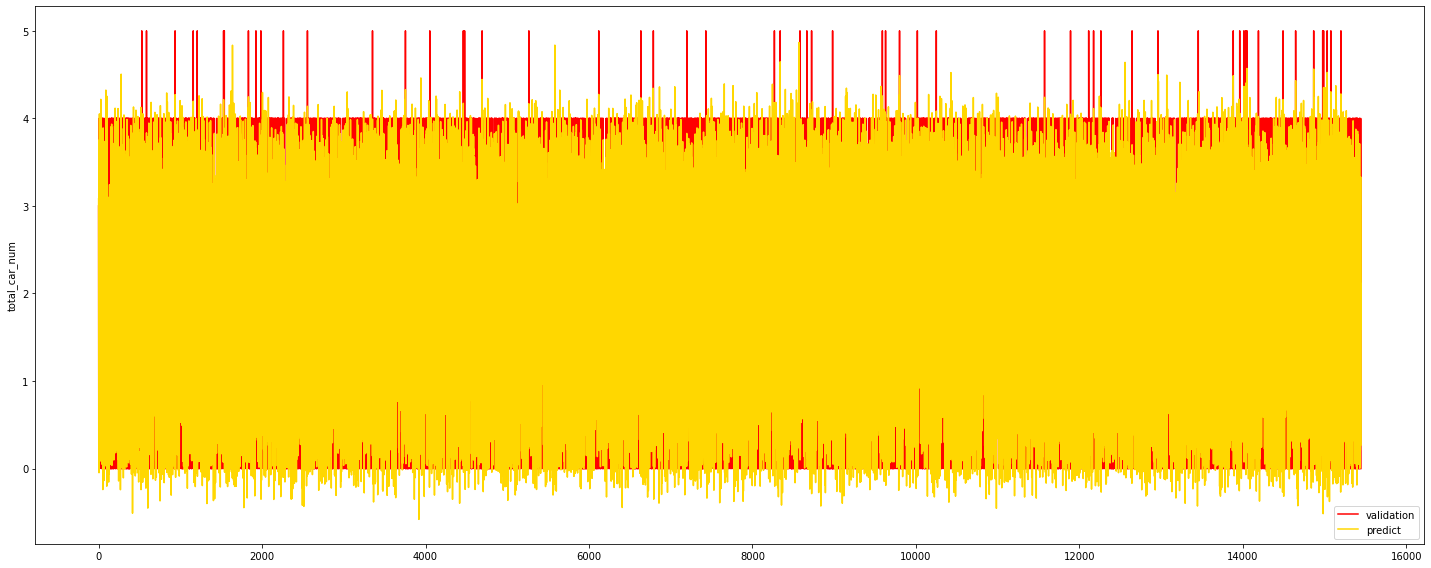

In [ ]:
# subplot 적용
plt.figure(figsize = (20, 8))

plt.plot(y_valid, color='red' , label='validation')
plt.plot(y_pred, color='gold' , label='predict')
plt.ylabel('total_car_num')

#chart.plot(roll_mean20, color='pink' , label='')
plt.legend(loc = 'lower right')
plt.tight_layout()
plt.show()

In [ ]:
score = model_adaboostgru.score(X_valid_t, y_valid)
print(score)

483/483 [==============================] - 3s 5ms/step
0.6865512247310462


#### 2. L2 Regularization
가중치 제곱에 비례하는 노이즈를 오차함수에 추가
- from keras import regularizers
- kernel_regularizer = regularizers.l2(0.00001)

In [ ]:
import tensorflow as tf
from keras.models import Sequential 
from keras.layers import Dense 
import keras.backend as K 
from keras.callbacks import EarlyStopping
from keras.layers.recurrent_v2 import GRU

#from keras.wrappers.scikit_learn import KerasRegressor
from scikeras.wrappers import KerasRegressor
from sklearn.ensemble import AdaBoostRegressor

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from keras import regularizers

K.clear_session()
    
model_gru = Sequential() # Sequeatial Model 
model_gru.add(GRU(units=128,kernel_regularizer = regularizers.l2(0.00001),input_shape=(30, 1)))
model_gru.add(Dense(1)) # output = 1 
#model_gru.compile(loss='mean_squared_error', optimizer='RMSprop')
model_gru.compile(loss='mean_squared_error', optimizer='adam', metrics='mean_squared_error') 
model_gru.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 128)               50304     
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 50,433
Trainable params: 50,433
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#kerasRegressor로 분류기 만든 뒤, AdaBoostRegressor로 최종 결합
GRU_Predictors = KerasRegressor(build_fn=lambda:model_gru, epochs=65, batch_size=32)
model_adaboostgru = AdaBoostRegressor(GRU_Predictors, n_estimators=1, random_state=42)

In [ ]:
model_adaboostgru.fit(X_train_t, y_train)

Epoch 1/65


/usr/local/lib/python3.7/dist-packages/scikeras/wrappers.py:290: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  "``build_fn`` will be renamed to ``model`` in a future release,"


1931/1931 [==============================] - 50s 25ms/step - loss: 2.1294 - mean_squared_error: 2.1293
Epoch 2/65
1931/1931 [==============================] - 46s 24ms/step - loss: 1.9584 - mean_squared_error: 1.9583
Epoch 3/65
1931/1931 [==============================] - 47s 24ms/step - loss: 1.8639 - mean_squared_error: 1.8638
Epoch 4/65
1931/1931 [==============================] - 46s 24ms/step - loss: 1.8048 - mean_squared_error: 1.8046
Epoch 5/65
1931/1931 [==============================] - 46s 24ms/step - loss: 1.7020 - mean_squared_error: 1.7018
Epoch 6/65
1931/1931 [==============================] - 46s 24ms/step - loss: 1.5706 - mean_squared_error: 1.5704
Epoch 7/65
1931/1931 [==============================] - 46s 24ms/step - loss: 1.4437 - mean_squared_error: 1.4435
Epoch 8/65
1931/1931 [==============================] - 46s 24ms/step - loss: 1.3451 - mean_squared_error: 1.3448
Epoch 9/65
1931/1931 [==============================] - 46s 24ms/step - loss: 1.2540 - mean_squared

AdaBoostRegressor(base_estimator=KerasRegressor(batch_size=32, build_fn=<function <lambda> at 0x7ffad1f05a70>, epochs=65),
                  n_estimators=1, random_state=42)

In [ ]:
y_pred = model_adaboostgru.predict(X_valid_t)

483/483 [==============================] - 6s 11ms/step


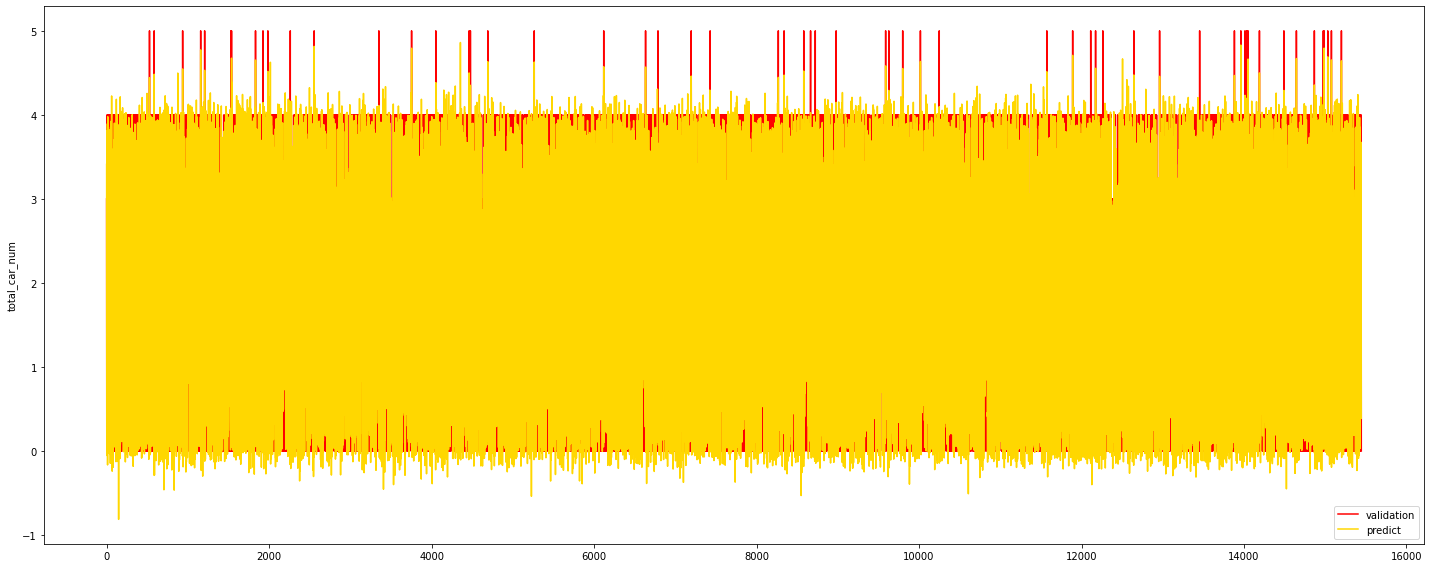

In [ ]:
# subplot 적용
plt.figure(figsize = (20, 8))

plt.plot(y_valid, color='red' , label='validation')
plt.plot(y_pred, color='gold' , label='predict')
plt.ylabel('total_car_num')

#chart.plot(roll_mean20, color='pink' , label='')
plt.legend(loc = 'lower right')
plt.tight_layout()
plt.show()

In [ ]:
score = model_adaboostgru.score(X_valid_t, y_valid)
print(score)

483/483 [==============================] - 4s 8ms/step
0.7267820752592535


#### 3. Dropout
train 동안 네트워크 일부 생략, epoch마다 drop되는 node 무작위
- model.add(layers.Dropout(0.5))

In [ ]:
import tensorflow as tf
#from keras import models, layers
from keras.models import Sequential 
from keras.layers import Dense 
import keras.backend as K 
from keras.callbacks import EarlyStopping
from keras.layers.recurrent_v2 import GRU

#from keras.wrappers.scikit_learn import KerasRegressor
from scikeras.wrappers import KerasRegressor
from sklearn.ensemble import AdaBoostRegressor

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from keras import regularizers

K.clear_session()
    
model_gru = Sequential() # Sequeatial Model 
model_gru.add(GRU(units=128,input_shape=(30, 1)))
model_gru.add(layers.Dropout(0.5))
model_gru.add(Dense(1)) # output = 1 
#model_gru.compile(loss='mean_squared_error', optimizer='RMSprop')
model_gru.compile(loss='mean_squared_error', optimizer='adam', metrics='mean_squared_error') 
model_gru.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 128)               50304     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 50,433
Trainable params: 50,433
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#kerasRegressor로 분류기 만든 뒤, AdaBoostRegressor로 최종 결합
GRU_Predictors = KerasRegressor(build_fn=lambda:model_gru, epochs=65, batch_size=32)
model_adaboostgru = AdaBoostRegressor(GRU_Predictors, n_estimators=1, random_state=42)

In [ ]:
model_adaboostgru.fit(X_train_t, y_train)

Epoch 1/65


/usr/local/lib/python3.7/dist-packages/scikeras/wrappers.py:290: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  "``build_fn`` will be renamed to ``model`` in a future release,"


1931/1931 [==============================] - 49s 24ms/step - loss: 2.2003 - mean_squared_error: 2.2003
Epoch 2/65
1931/1931 [==============================] - 46s 24ms/step - loss: 2.0100 - mean_squared_error: 2.0100
Epoch 3/65
1931/1931 [==============================] - 46s 24ms/step - loss: 1.9328 - mean_squared_error: 1.9328
Epoch 4/65
1931/1931 [==============================] - 47s 25ms/step - loss: 1.8270 - mean_squared_error: 1.8270
Epoch 5/65
1931/1931 [==============================] - 47s 24ms/step - loss: 1.7267 - mean_squared_error: 1.7267
Epoch 6/65
1931/1931 [==============================] - 48s 25ms/step - loss: 1.6292 - mean_squared_error: 1.6292
Epoch 7/65
1931/1931 [==============================] - 47s 24ms/step - loss: 1.5460 - mean_squared_error: 1.5460
Epoch 8/65
1931/1931 [==============================] - 47s 24ms/step - loss: 1.4690 - mean_squared_error: 1.4690
Epoch 9/65
1931/1931 [==============================] - 47s 24ms/step - loss: 1.3940 - mean_squared

AdaBoostRegressor(base_estimator=KerasRegressor(batch_size=32, build_fn=<function <lambda> at 0x7ffad1f5e5f0>, epochs=65),
                  n_estimators=1, random_state=42)

In [ ]:
y_pred = model_adaboostgru.predict(X_valid_t)

483/483 [==============================] - 6s 12ms/step


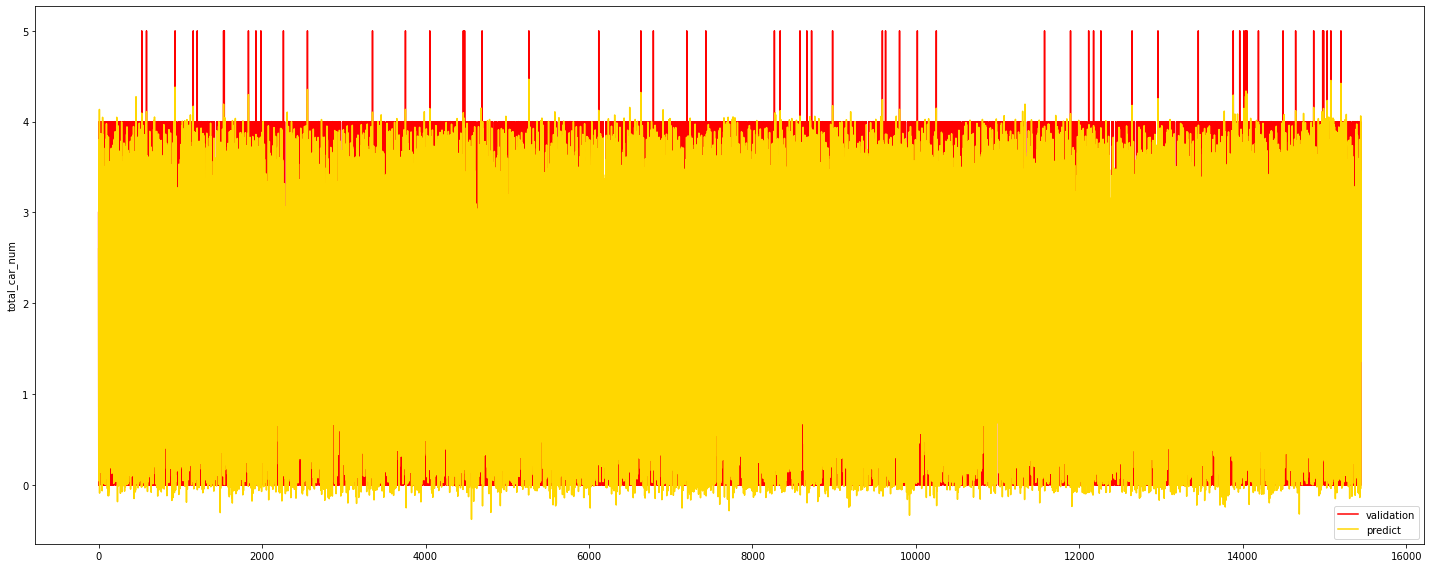

In [ ]:
# subplot 적용
plt.figure(figsize = (20, 8))

plt.plot(y_valid, color='red' , label='validation')
plt.plot(y_pred, color='gold' , label='predict')
plt.ylabel('total_car_num')

#chart.plot(roll_mean20, color='pink' , label='')
plt.legend(loc = 'lower right')
plt.tight_layout()
plt.show()

In [ ]:
score = model_adaboostgru.score(X_valid_t, y_valid)
print(score)

483/483 [==============================] - 4s 8ms/step
0.7320248934273688


#Result-Loss

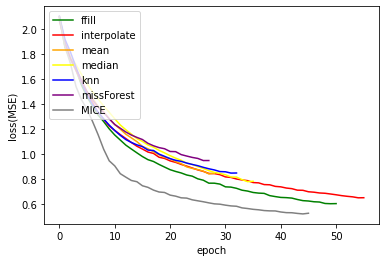

In [ ]:
figs, loss_ax = plt.subplots()
loss_ax.plot(hist_ffill.history['loss'],'y',label='ffill', color='green')
loss_ax.plot(hist_interpolate.history['loss'],'y',label='interpolate', color='red')
loss_ax.plot(hist_mean.history['loss'],'y',label='mean', color='orange')
loss_ax.plot(hist_median.history['loss'],'y',label='median', color='yellow')
loss_ax.plot(hist_knn.history['loss'],'y',label='knn', color='blue')
loss_ax.plot(hist_missForest.history['loss'],'y',label='missForest', color='purple')
loss_ax.plot(hist_mice.history['loss'],'y',label='MICE', color='gray')

loss_ax.legend(loc='upper left')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss(MSE)')


plt.show()

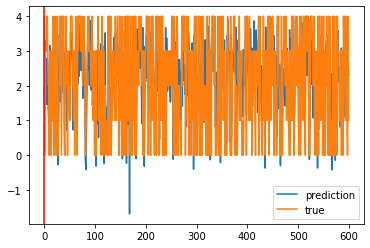

In [ ]:
preds = model.predict(X_test_t)

plt.plot(preds[:600], label='prediction')
plt.plot(y_test[:600], label='true')
plt.axvline(x=len(y_test)-len(preds), color='r')
plt.legend()
plt.show()